<a href="https://colab.research.google.com/github/Nagendra320/Aerofit-Data-Analysis/blob/main/Aerofit_Treadmill_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
## About This Notebook
This notebook is designed to perform a comprehensive analysis of the customer data from Aerofit, a leading manufacturer and retailer of fitness equipment. The objective of this analysis is to derive actionable insights into the characteristics of customers who purchase different types of treadmills. The findings from this analysis will assist Aerofit's marketing and sales teams in tailoring their strategies to better meet the needs of their target audience.

## About Aerofit
Aerofit stands at the forefront of the fitness equipment industry, offering a wide range of products that cater to a diverse clientele. From high-end treadmills to versatile gym equipment and accessories, Aerofit is committed to enhancing the fitness experience for both casual users and fitness enthusiasts. With a reputation for quality and innovation, Aerofit aims to empower individuals to achieve their fitness goals through superior products that blend performance and reliability.

## Business Problem
Aerofit's market research team has identified a need to more deeply understand the customer segments for each type of treadmill in their product lineup. The goal is to optimize product recommendations and increase customer satisfaction by aligning product features with customer expectations and usage patterns. To achieve this, the team will explore various customer characteristics such as age, income, fitness level, and purchasing behavior to identify distinct profiles for each treadmill model. By analyzing these profiles, Aerofit can tailor its marketing strategies and product development efforts to better meet the needs of each segment.

## Analytical Approach
This analysis will focus primarily on descriptive analytics to categorize and understand different customer profiles. We will employ various statistical tools and data visualization techniques to explore the data, identify patterns, and derive insights. Specifically, we will calculate marginal, joint, and conditional probabilities to understand the relationships between customer characteristics and their product choices. This approach will enable us to provide targeted recommendations without the use of complex machine learning models, ensuring clarity and accessibility of insights.

Through this structured analysis, we aim to provide Aerofit with clear, actionable recommendations based on solid data-driven insights. Let's dive into the data and start our exploratory journey.

##Loading the Data
To begin our analysis, we will load the
dataset from its source, which could be a CSV file, an Excel sheet, or directly fetched from a database. For this notebook, we assume the data is stored in a CSV file and use pandas, a powerful data manipulation library in Python, to read the file and display the initial rows of the dataset. This will give us an initial understanding of the data's structure and the type of data each column contains.

Let's proceed with loading the data and taking a first look at its contents.

In [ ]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset.
aerofit=pd.read_csv('/content/drive/MyDrive/aerofit_treadmill.csv')

In [ ]:
# A glance at the dataset.
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Shape of the data set.
print(f"Numbers of rows: {aerofit.shape[0]}")
print(f"Numbers of columns: {aerofit.shape[1]}")

Numbers of rows: 180
Numbers of columns: 9


In [ ]:
# data type of each column.
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Data Attributes
The dataset includes the following attributes:

* Product Purchased: Identifier for the treadmill model purchased (KP281, KP481, or KP781).
* Age: The customer's age in years.
* Gender: The customer's gender (Male/Female).
* Education: The number of years of education the customer has completed.
* Marital Status: Marital status of the customer (Single or Partnered).
* Usage: Anticipated weekly usage of the treadmill (in times per week).
* Income: Annual income of the customer.
* Fitness: A self-rated fitness level on a scale from 1 (poor shape) to 5 (excellent shape).
* Miles: Expected number of miles the customer plans to walk/run each week on the treadmill.

In [ ]:
# Statistical summary of the numerical columns.
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Created a loop to check unique values in each column.
for x in aerofit.columns:
    print(f"{x} : {aerofit[x].unique()}")

Product : ['KP281' 'KP481' 'KP781']
Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender : ['Male' 'Female']
Education : [14 15 12 13 16 18 20 21]
MaritalStatus : ['Single' 'Partnered']
Usage : [3 2 4 5 6 7]
Fitness : [4 3 2 1 5]
Income : [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles : [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [ ]:
# Created a loop to check number of unique values in each column.
for x in aerofit.columns:
    print(f"{x} : {aerofit[x].nunique()}")

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


## Univariate Analysis
Univariate analysis involves the examination of each variable in a dataset independently. This type of analysis is crucial as it helps us to understand the distribution, central tendency, variability, and presence of outliers in the data. By analyzing variables one by one, we can gather insights about the characteristics of the data which might not be apparent in multivariate analysis. This step is fundamental in identifying patterns, anomalies, or peculiarities that might warrant a deeper investigation or consideration during further analyses.

In this section, we will conduct a univariate analysis for each variable in our dataset. This will include:

* **Count Plots** for categorical variables to see the distribution of categories.
* **Histograms/KDE** Plots for continuous variables to observe their distribution.
* **Box Plots** to identify outliers and understand the spread of continuous variables.

This analysis will enable us to decide if any transformations, such as binning or normalizing the data, are necessary before we proceed to bivariate or multivariate analysis.

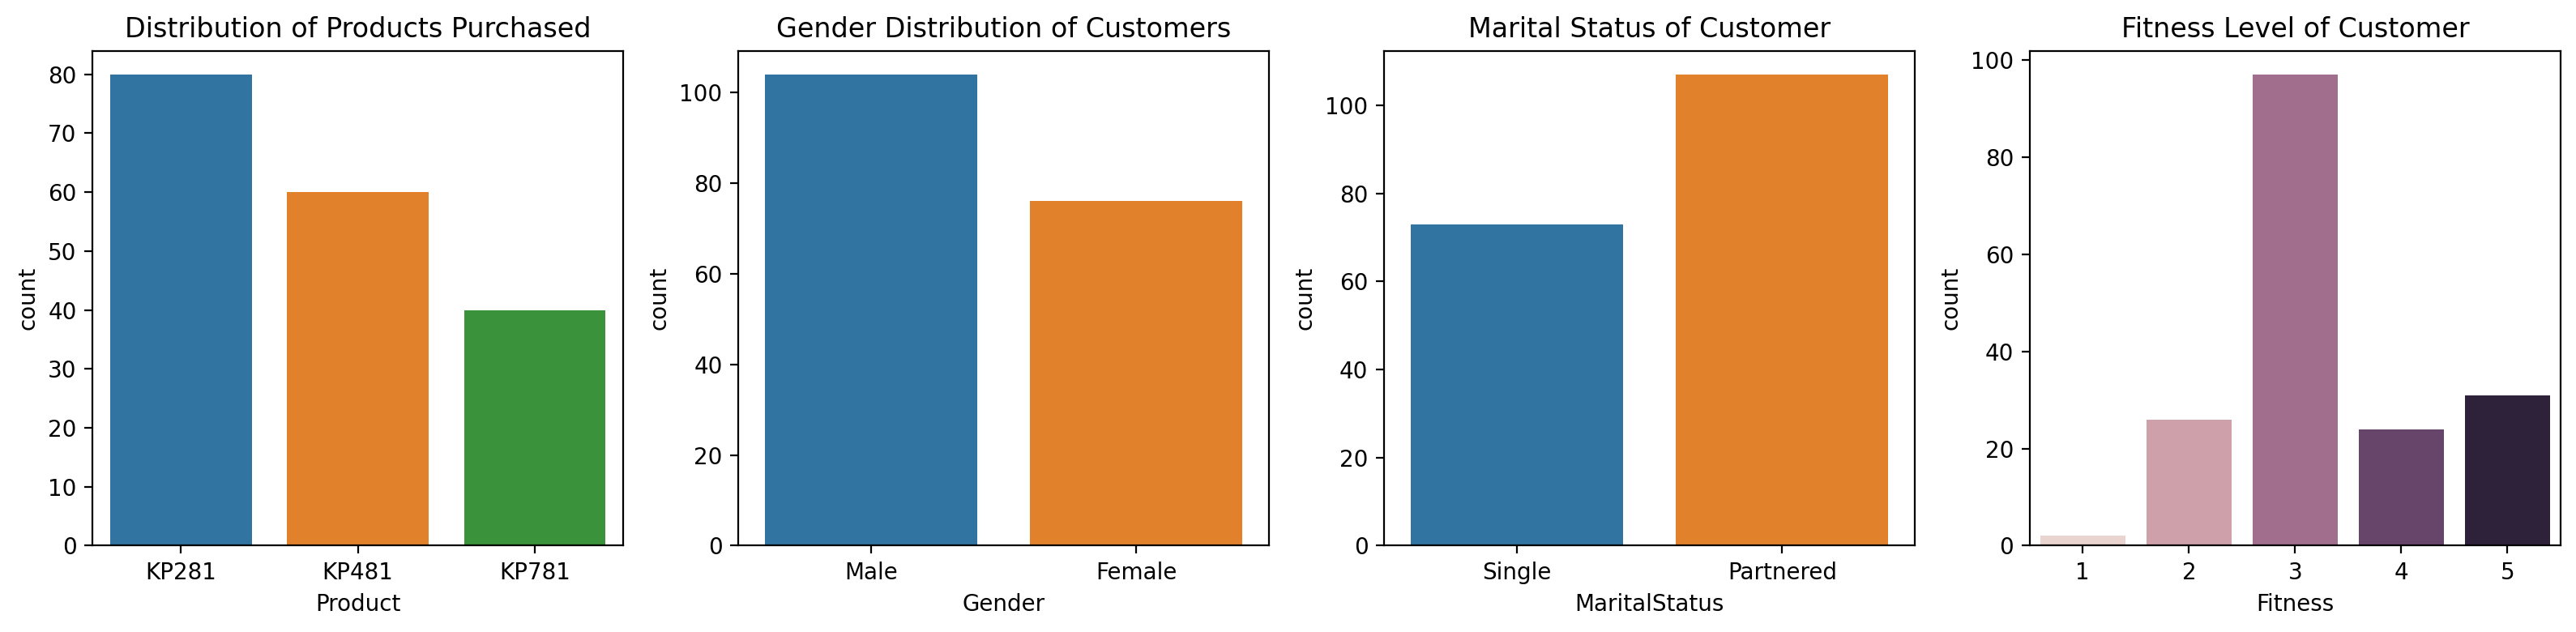

In [ ]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1,ncols=4,figsize=(16,4),dpi=200)

# Ploting commands
sns.countplot(data=aerofit,x='Product',hue='Product',ax=axs[0])
sns.countplot(data=aerofit,x='Gender',hue='Gender',ax=axs[1])
sns.countplot(data=aerofit,x='MaritalStatus',hue='MaritalStatus',ax=axs[2])
sns.countplot(data=aerofit,x='Fitness',hue='Fitness',ax=axs[3], legend=False)

# Titles
axs[0].set_title('Distribution of Products Purchased')
axs[1].set_title('Gender Distribution of Customers')
axs[2].set_title('Marital Status of Customer')
axs[3].set_title('Fitness Level of Customer')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

In [ ]:
#Naming the ratings
fitness_ratings={1:'Very Poor',2:'Poor',3:'Average',4:'Good',5:'Excellent'}
aerofit['Fitness Level']=aerofit['Fitness'].map(fitness_ratings)

#Converting the data type of columns into category
for x in aerofit.columns:
    if aerofit[x].dtype == 'object':
        aerofit[x]=aerofit[x].astype('category')

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Fitness Level  180 non-null    category
dtypes: category(4), int64(6)
memory usage: 9.8 KB


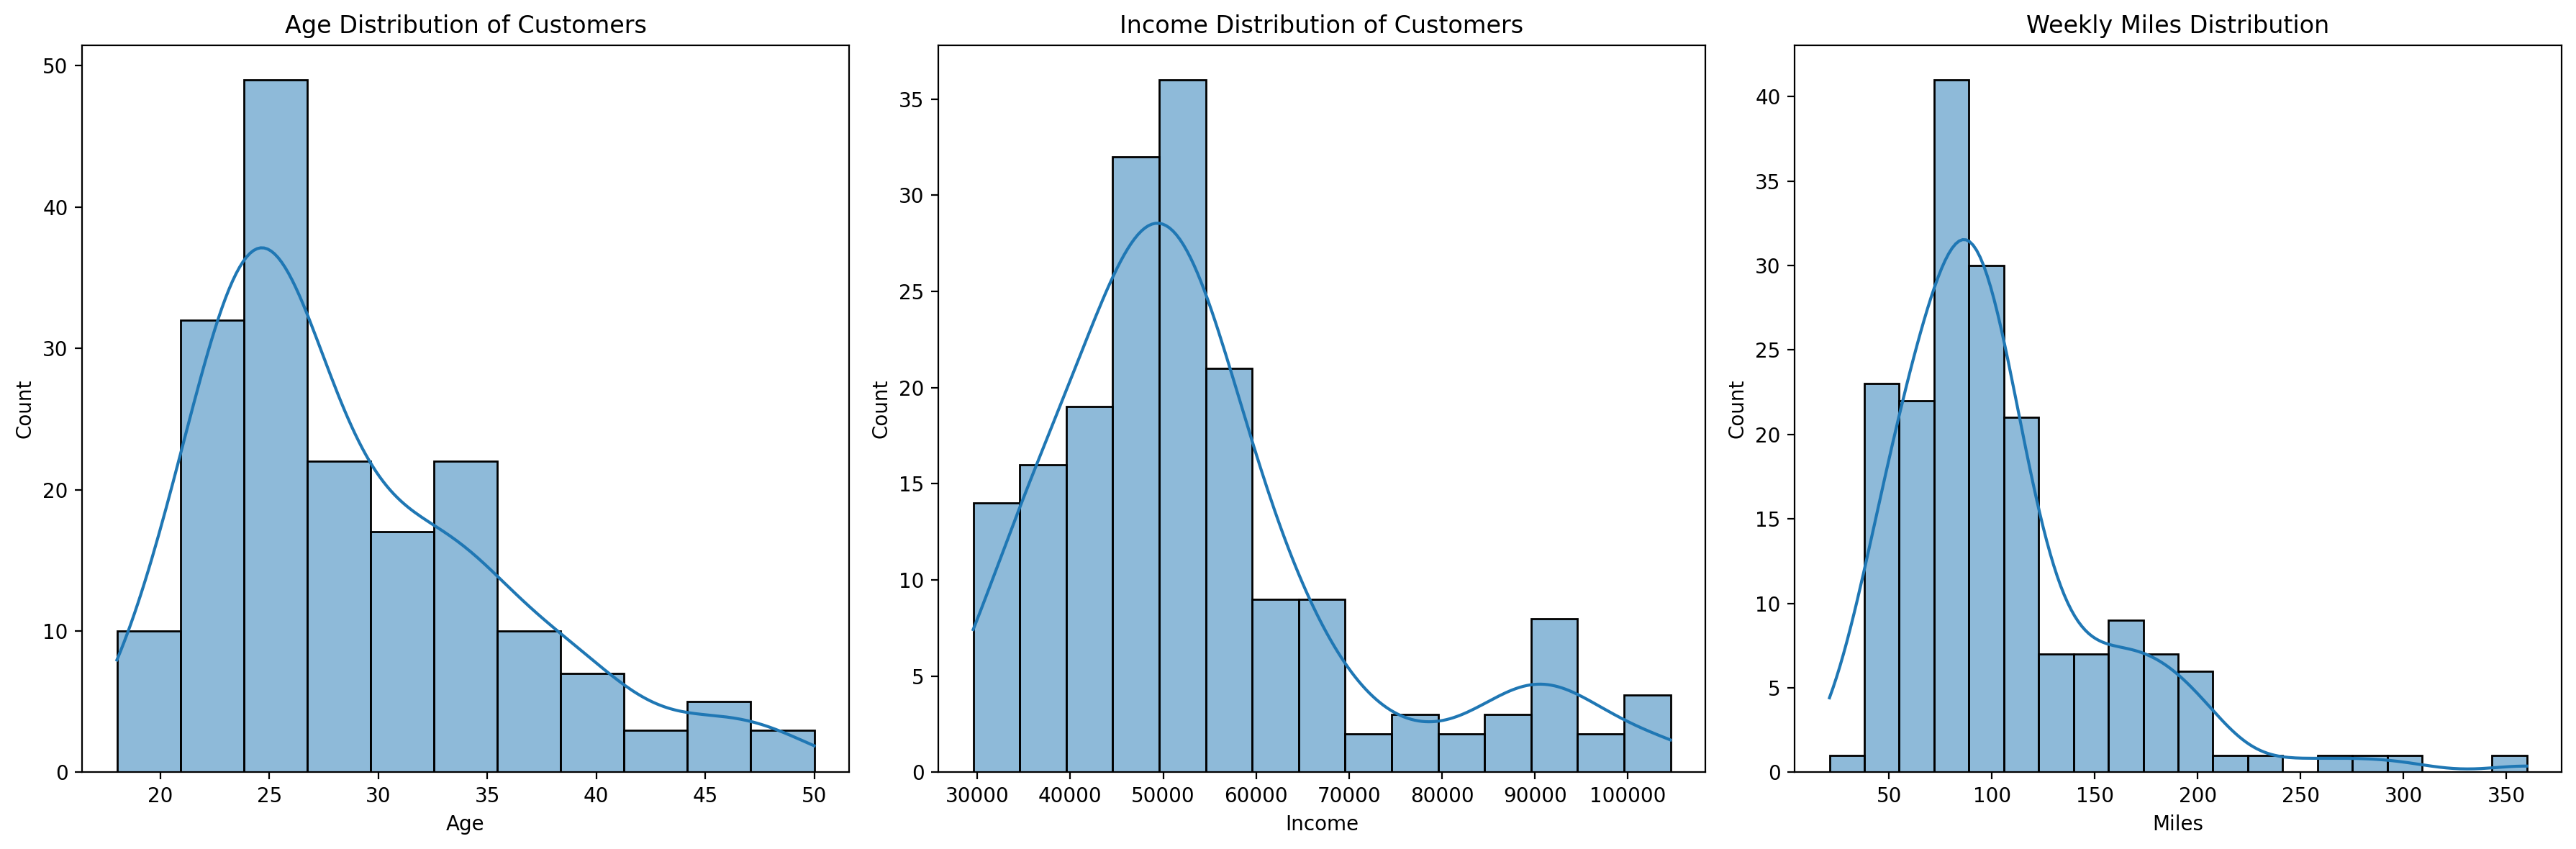

In [ ]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,6),dpi=200)

# Ploting commands
sns.histplot(data=aerofit,x='Age', ax=axs[0],kde=True, legend=False)
sns.histplot(data=aerofit,x='Income', ax=axs[1],kde=True, legend=False)
sns.histplot(data=aerofit,x='Miles', ax=axs[2],kde=True, legend=False)

# Titles
axs[0].set_title('Age Distribution of Customers')
axs[1].set_title('Income Distribution of Customers')
axs[2].set_title('Weekly Miles Distribution')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

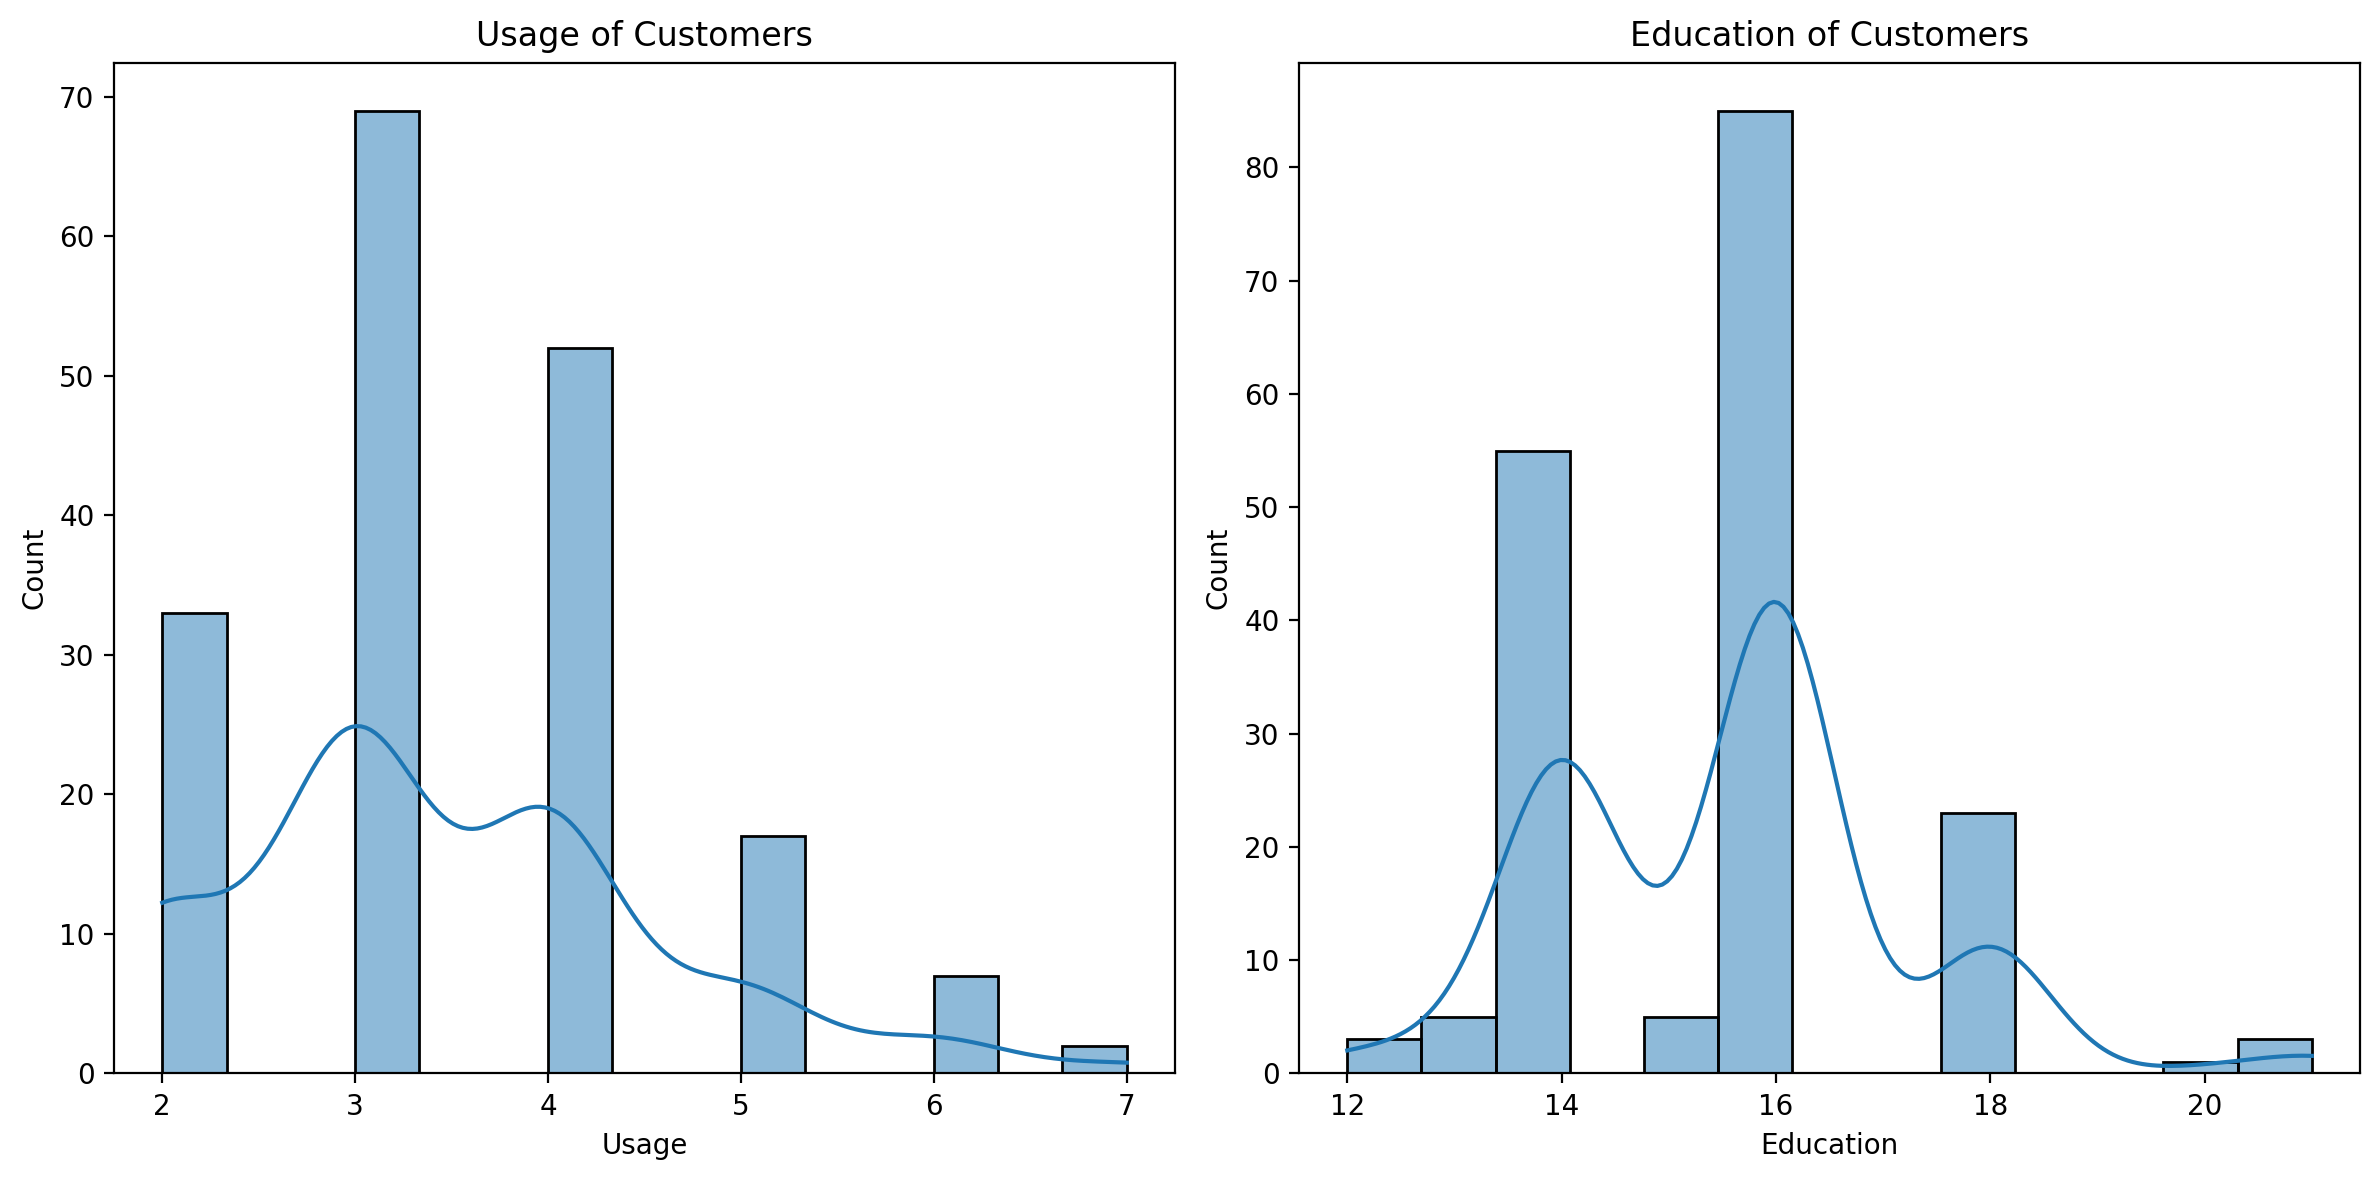

In [ ]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6),dpi=200)

# Ploting commands
sns.histplot(data=aerofit, x='Usage', ax=axs[0], kde=True, legend=False)
sns.histplot(data=aerofit, x='Education', ax=axs[1], kde=True, legend=False)

# Titles
axs[0].set_title('Usage of Customers')
axs[1].set_title('Education of Customers')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

In [ ]:
# Define bins for the 'Usage' variable based on observed ranges and desired grouping.
bins=[aerofit['Usage'].min(),4,6,aerofit['Usage'].max()+1]
labels=['Low','Moderate','High']
aerofit['Usage Level']=pd.cut(x=aerofit['Usage'], right=False, bins=bins, labels=labels)

#Define bins for the 'Education' variable to categorize educational years into groups.
bins=[0,12,16,aerofit['Education'].max()]
labels=['High School','Graduate','Post-Graduate']
aerofit['Education Level']=pd.cut(x=aerofit['Education'], bins=bins, labels=labels)

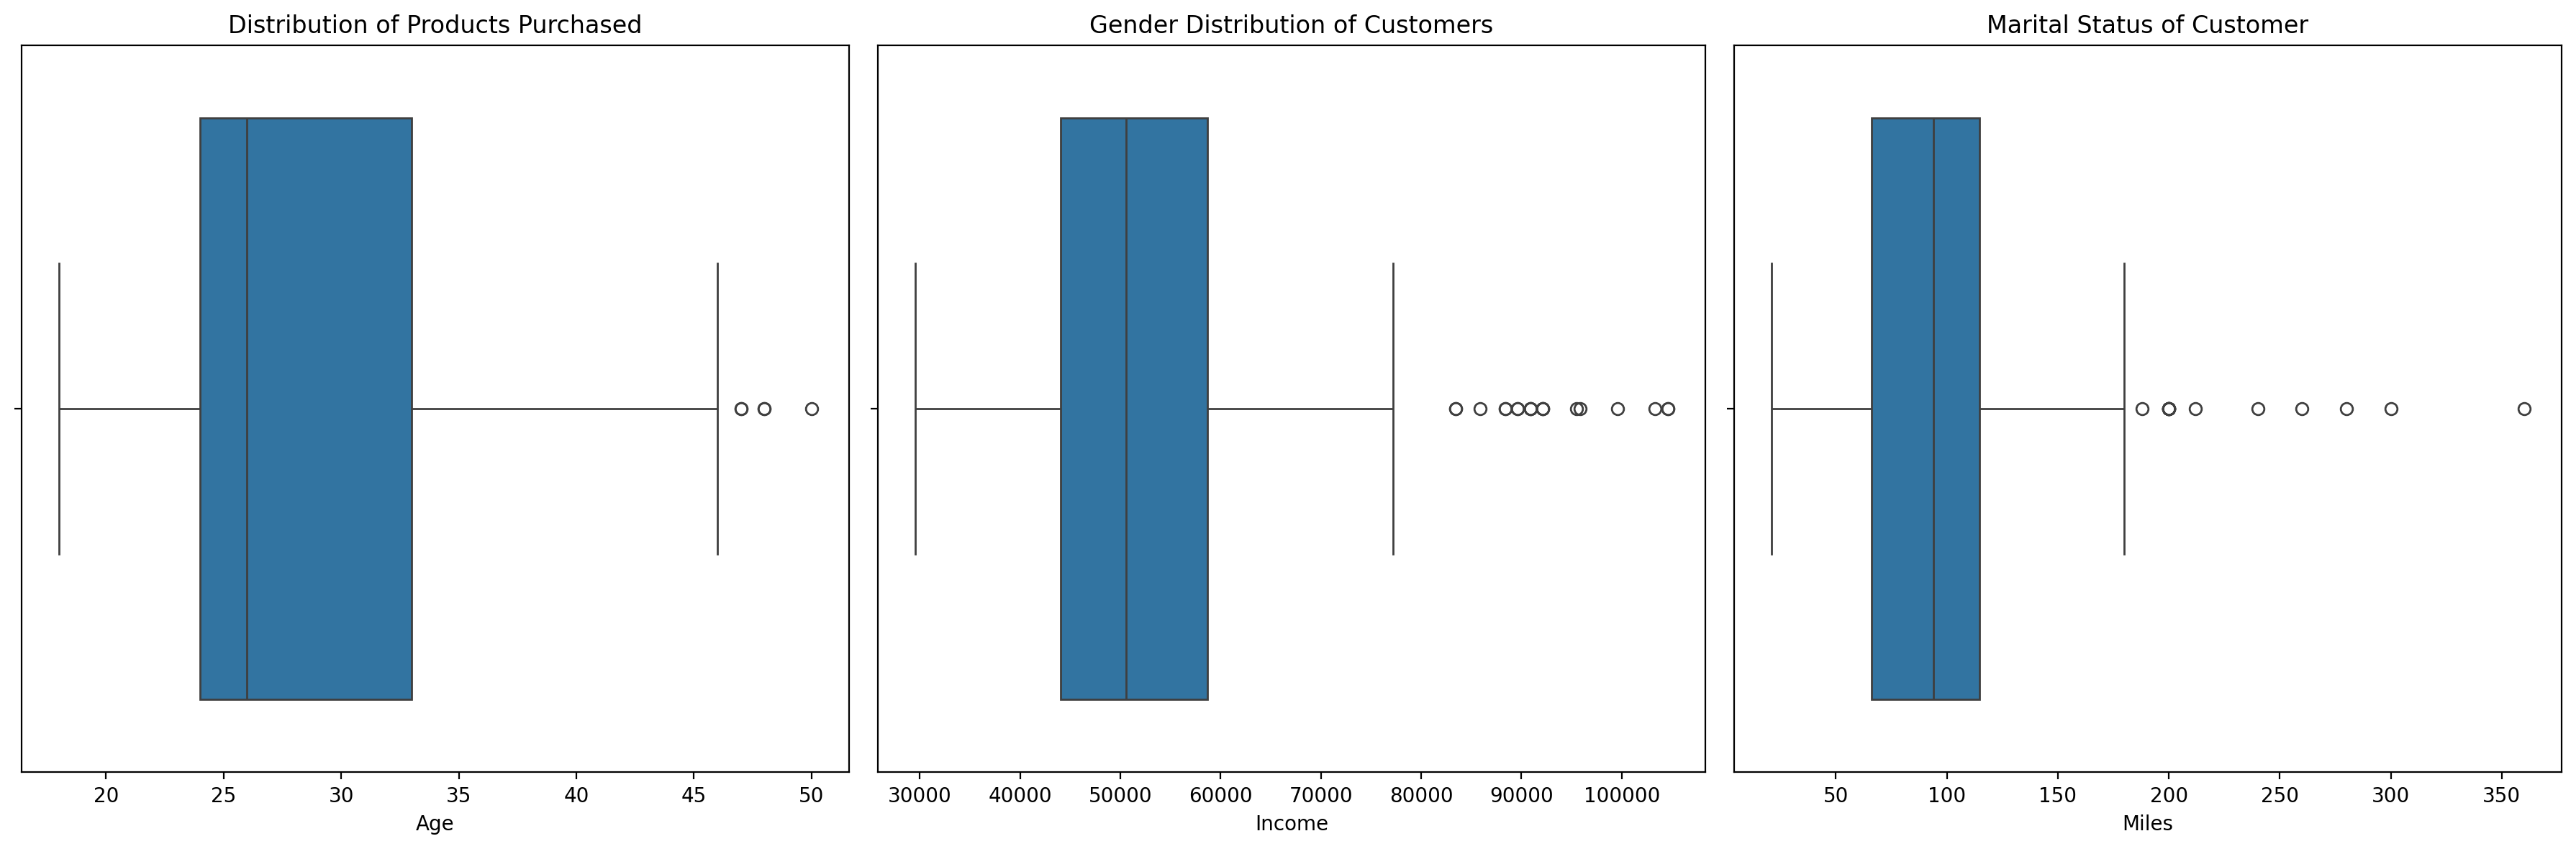

In [ ]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(18,6),dpi=200)

# Ploting commands
sns.boxplot(data=aerofit,x='Age', ax=axs[0], legend=False)
sns.boxplot(data=aerofit,x='Income', ax=axs[1], legend=False)
sns.boxplot(data=aerofit,x='Miles', ax=axs[2], legend=False)

# Titles
axs[0].set_title('Distribution of Products Purchased')
axs[1].set_title('Gender Distribution of Customers')
axs[2].set_title('Marital Status of Customer')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

In [ ]:
# Define age bins to segment the population into meaningful groups
bins=[0,19,34,aerofit['Age'].max()]
labels=['Teenage','Young Adults','Adults']
aerofit['Age Group']=pd.cut(x=aerofit['Age'], bins=bins, labels=labels)

After conducting the univariate analysis, it became evident that categorizing certain columns would facilitate further analysis and yield more meaningful insights. To enhance the dataset's utility and interoperability, variables such as 'Product', 'Gender', 'MaritalStatus', and 'Fitness Level' were converted to the category data type, which optimizes memory usage and operational speed due to their limited, repetitive values. The following detailed categorizations were applied:

1. **Age Grouping**:
   - **Teenage**: 0-19 years
   - **Young Adults**: 20-34 years
   - **Adults**: 35 years and above

2. **Usage Level Grouping**:
   - **Low**: Up to 4 times per week
   - **Moderate**: 4-6 times per week
   - **High**: More than 6 times per week

3. **Education Level Grouping**:
   - **High School**: Up to 12 years of education
   - **Graduate**: 12-16 years
   - **Post-Graduate**: More than 16 years

4. **Fitness Level Categorization**:
   - **Very Poor**: Minimal regular physical activity
   - **Poor**: Limited physical activity, below average fitness
   - **Average**: Regular physical activity, average fitness
   - **Good**: Frequently active, above average fitness
   - **Excellent**: Highly active, peak fitness

These categorizations help in simplifying the visualization of data, making it easier to identify trends and patterns across different customer segments, which enhances the interpretability of the data.

In [ ]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    category
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    category
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   Fitness Level    180 non-null    category
 10  Usage Level      180 non-null    category
 11  Education Level  180 non-null    category
 12  Age Group        180 non-null    category
dtypes: category(7), int64(6)
memory usage: 10.8 KB


In [ ]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Level,Usage Level,Education Level,Age Group
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low,Graduate,Teenage
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low,Graduate,Teenage
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Moderate,Graduate,Teenage
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Low,High School,Teenage
4,KP281,20,Male,13,Partnered,4,2,35247,47,Poor,Moderate,Graduate,Young Adults


## Bivariate Analysis
In this section, we delve into bivariate analysis, which involves exploring relationships between pairs of variables in our dataset. The primary objective of this analysis is to uncover any significant interactions or associations between variables that can provide deeper insights into customer behaviors and preferences. By examining how variables relate to each other, we can identify trends, dependencies, and potentially causal relationships that help us understand the dynamics of our customer base better.

* Categorical vs. Categorical: Exploring associations between categorical variables to understand how different groups relate.
* Numerical vs. Numerical: Investigating correlations to identify trends and potential causal relationships.
* Categorical vs. Numerical: Comparing numerical data across different categories to see how metrics differ among groups.

### Comparing product with different categorical columns

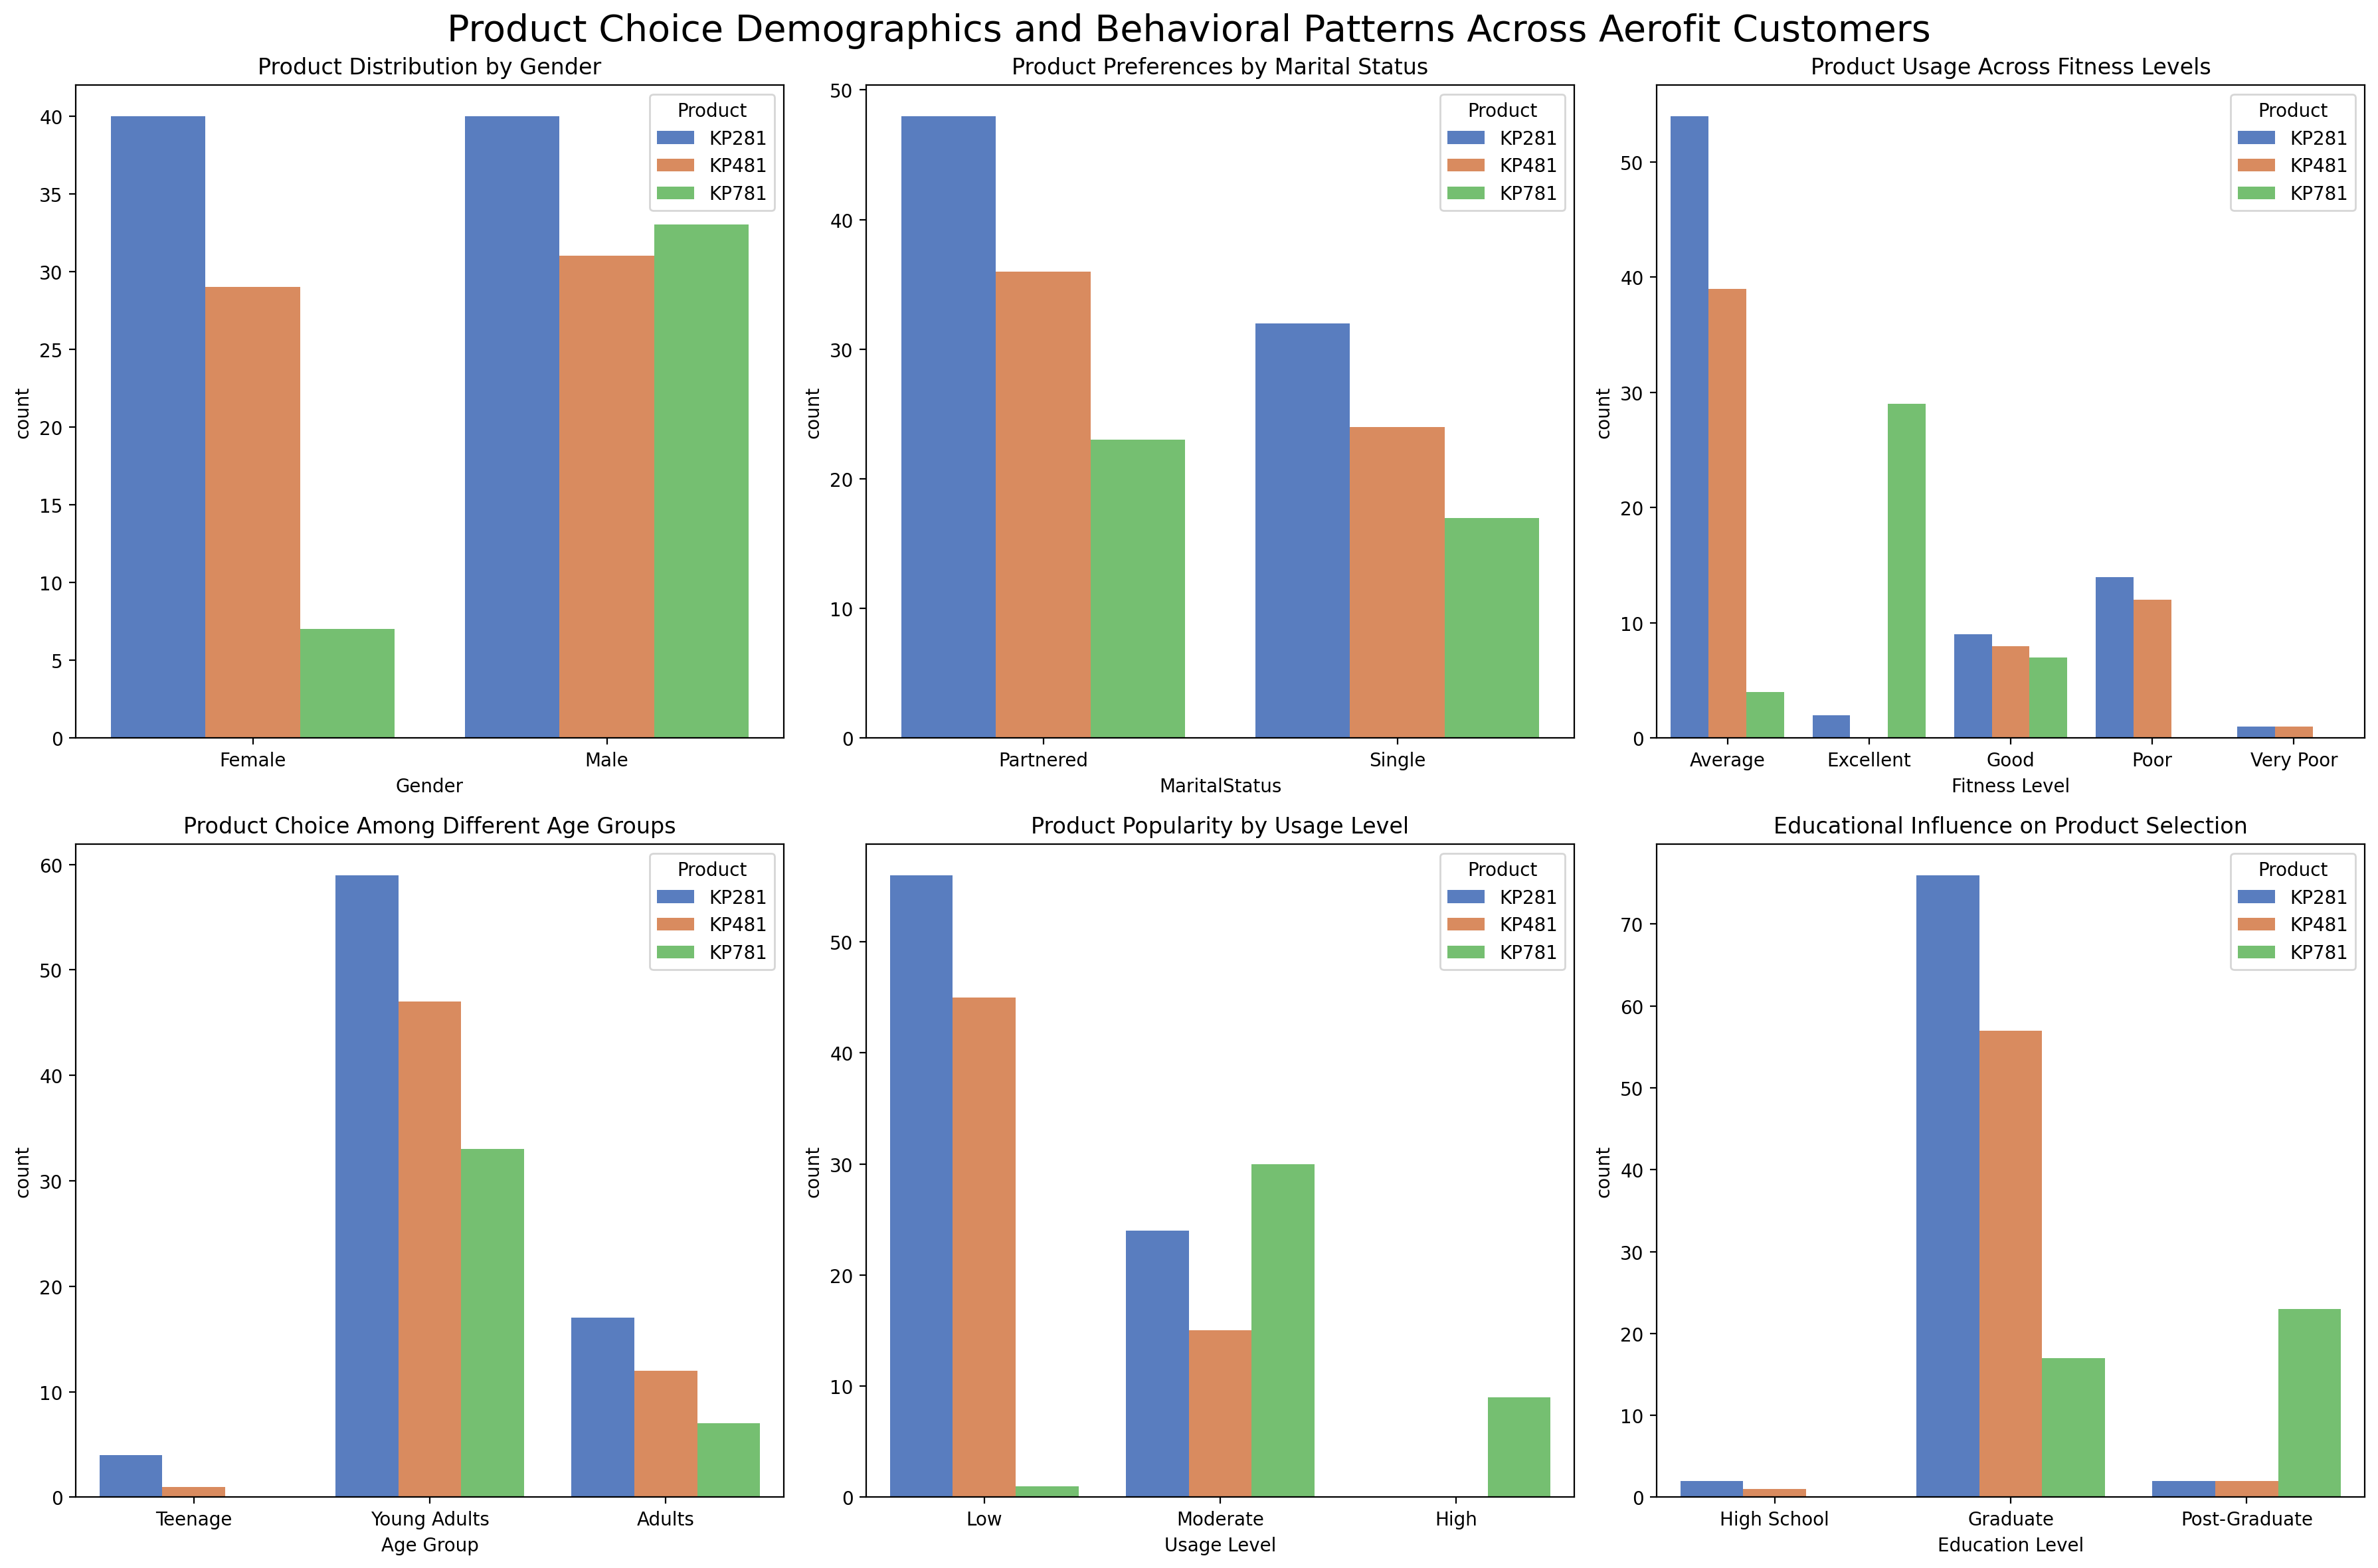

In [ ]:
#Setting up the canvas
fig,axs=plt.subplots(ncols=3, nrows=2, figsize=(18,12), dpi=200)

#plotting
sns.countplot(data=aerofit, x='Gender', hue='Product', ax=axs[0,0], palette='muted')
sns.countplot(data=aerofit, x='MaritalStatus', hue='Product', ax=axs[0,1], palette='muted')
sns.countplot(data=aerofit, x='Fitness Level', hue='Product', ax=axs[0,2], palette='muted')
sns.countplot(data=aerofit, x='Age Group', hue='Product', ax=axs[1,0], palette='muted')
sns.countplot(data=aerofit, x='Usage Level', hue='Product', ax=axs[1,1], palette='muted')
sns.countplot(data=aerofit, x='Education Level', hue='Product', ax=axs[1,2], palette='muted')

#Title
fig.suptitle('Product Choice Demographics and Behavioral Patterns Across Aerofit Customers', size=20)
axs[0,0].set_title('Product Distribution by Gender')
axs[0,1].set_title('Product Preferences by Marital Status')
axs[0,2].set_title('Product Usage Across Fitness Levels')
axs[1,0].set_title('Product Choice Among Different Age Groups')
axs[1,1].set_title('Product Popularity by Usage Level')
axs[1,2].set_title('Educational Influence on Product Selection')

#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

### Analysis of Product Choices Among Aerofit Customers by Demographic and Behavioral Patterns

From the subplots, it is evident that Aerofit's **KP281** treadmill model is particularly popular, dominating purchases across both genders. The analysis further reveals distinct patterns in treadmill purchases related to demographic and usage characteristics:

* Gender Influence: Male customers predominantly purchase treadmills, with the KP281 model being the most popular among both genders. This suggests a strong market presence among males.
* Marital Status: There is a notable preference for treadmills among partnered customers compared to single customers. This trend may indicate that partnered individuals are more likely to invest in home fitness equipment.
* Fitness Levels: Customers who self-identify with an average fitness level are the most frequent buyers of treadmills. This could imply that the product is perceived as a starting point for regular fitness routines or as a staple piece of equipment in home gyms.
* Age Groups: Young adults emerge as significant purchasers of treadmills, pointing to a demographic that values fitness accessibility at home. The trend among young adults to invest in fitness equipment could be driven by lifestyle preferences or a desire for convenience.
* Educational Background: Graduates show a higher tendency to purchase treadmills, suggesting that higher education levels might correlate with greater health consciousness or disposable income for fitness investments.
* Usage Levels: Interestingly, individuals who report lower usage levels still tend to own treadmills. This could indicate that even those who do not use them intensively perceive treadmills as valuable for occasional fitness activities.

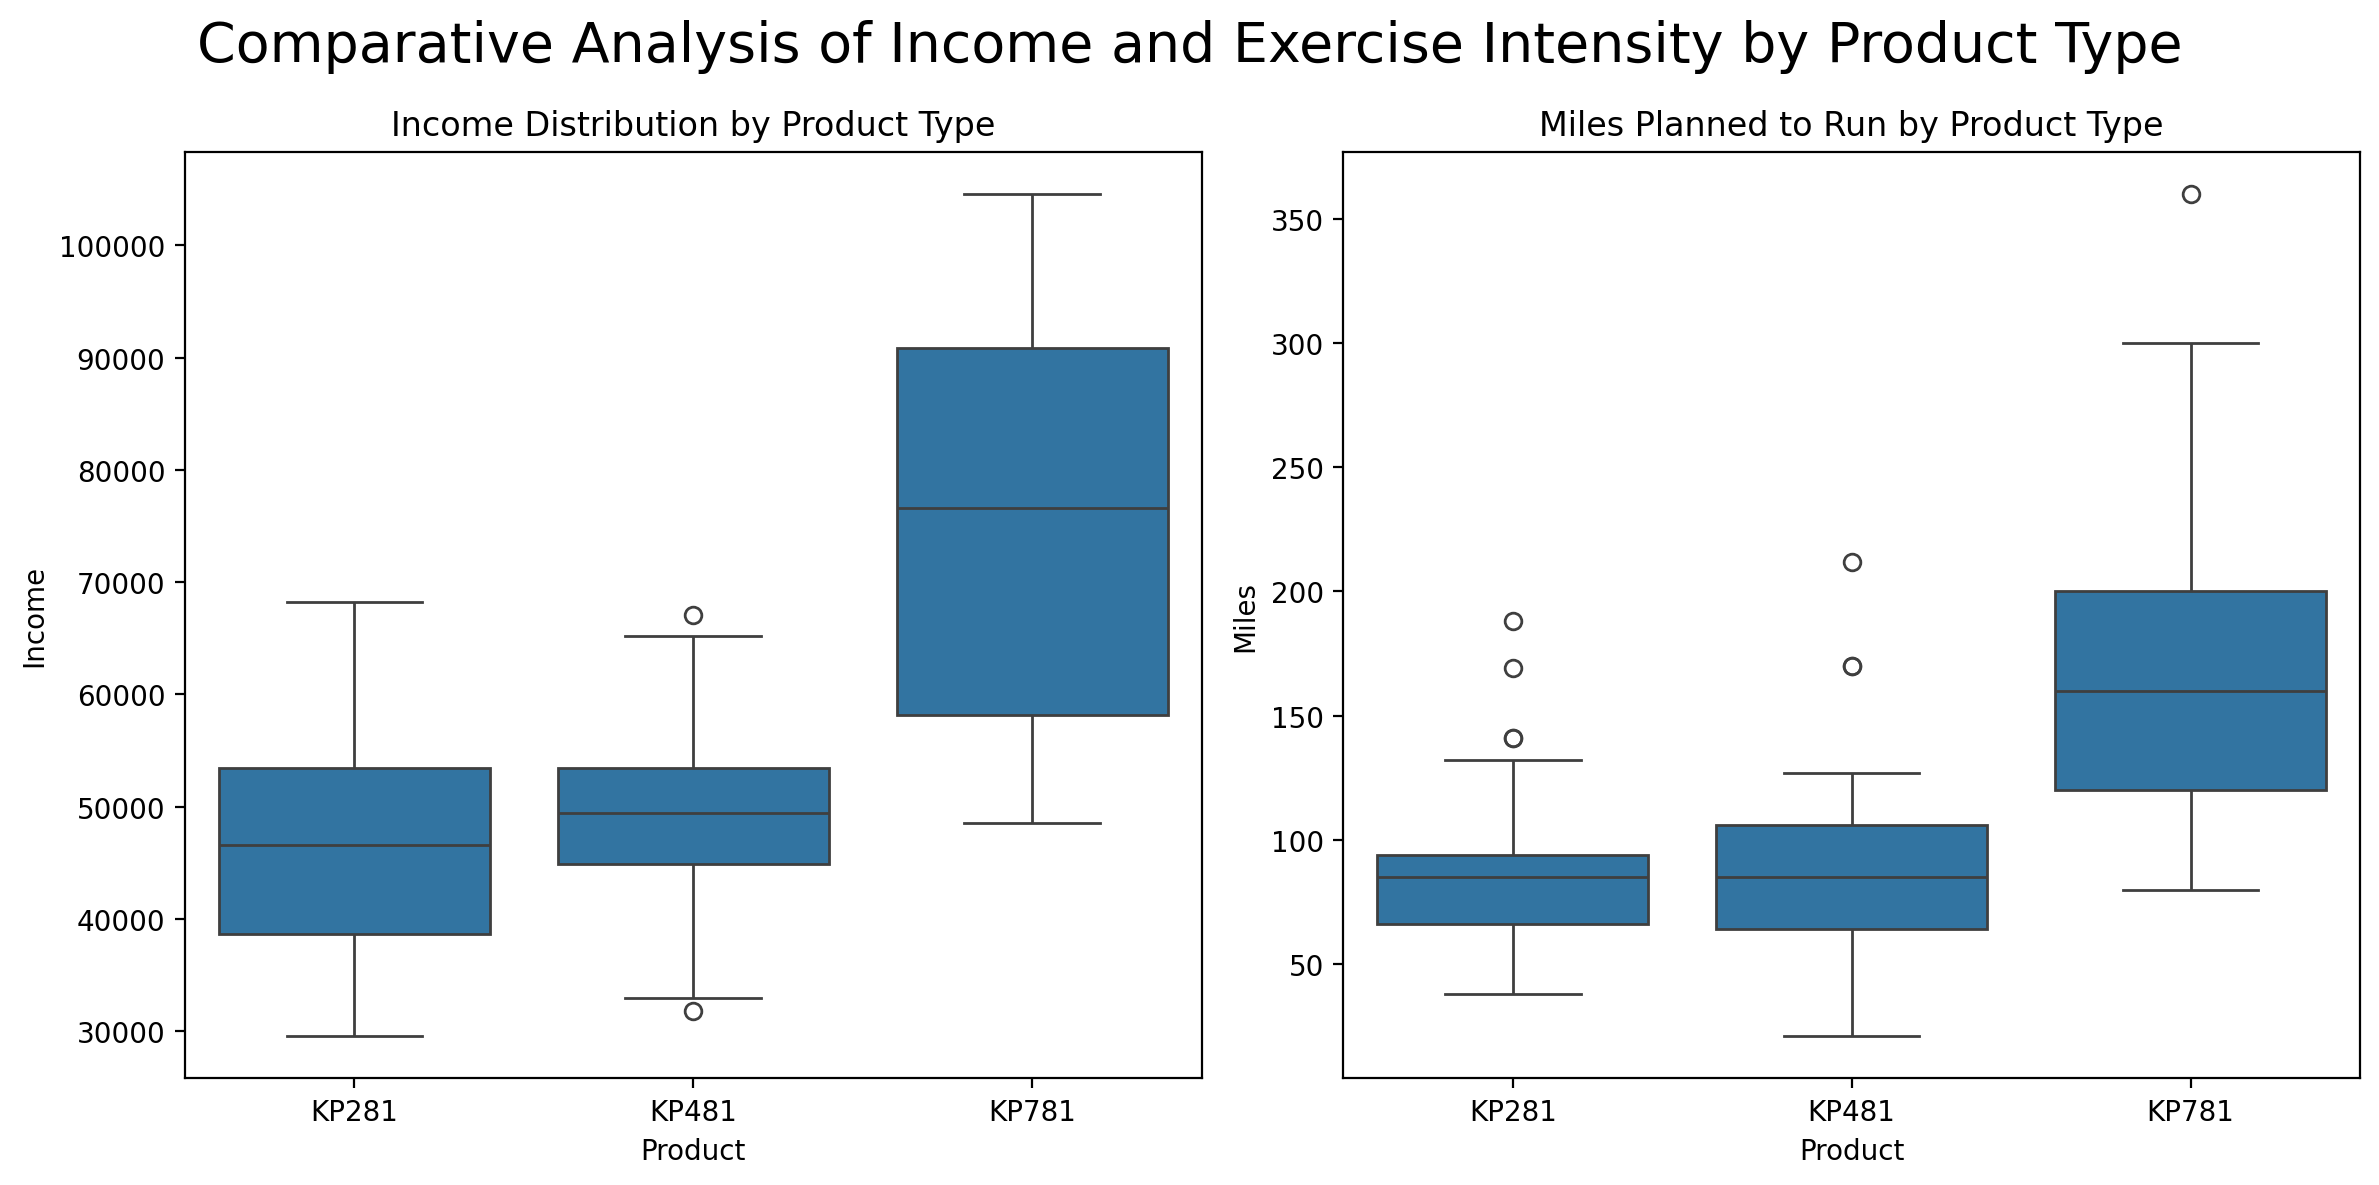

In [ ]:
#Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=1, figsize=(12,6), dpi=200)

#plotting
sns.boxplot(data=aerofit, x='Product', y='Income', ax=axs[0])
sns.boxplot(data=aerofit, x='Product', y='Miles', ax=axs[1])

#Title
fig.suptitle('Comparative Analysis of Income and Exercise Intensity by Product Type', size=20)
axs[0].set_title('Income Distribution by Product Type')
axs[1].set_title('Miles Planned to Run by Product Type')

#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

In the "Comparative Analysis of Income and Exercise Intensity by Product Type" subplot, clear purchasing patterns emerge for different Aerofit treadmill models, influenced by customer income and exercise ambitions.

The "Income Distribution by Product Type" graph shows a distinct economic separation among the treadmill choices. The KP-281 and KP-481 models are primarily chosen by customers with incomes below \$70,000, with the bulk clustering between \$45,000 and \$50,000. This suggests that these models are perceived as more affordable or adequately featured for this economic segment. In contrast, the KP-781 model is preferred by those with incomes above \$50,000, with most incomes around \$80,000, pointing to a preference for higher-end features.

Similarly, the "Miles Planned to Run by Product Type" graph illustrates differing fitness intentions. Buyers of the KP-281 and KP-481 models generally aim to run less than 100 miles per week, making these treadmills suitable for moderate fitness routines. Meanwhile, KP-781 purchasers set more ambitious goals, typically planning to run over 150 miles weekly, with peaks reaching beyond 300 miles. This indicates that the KP-781 is likely designed for serious runners or those with rigorous training regimes, underscoring its premium model status.

### Multivariate Analysis
In this section, we embark on multivariate analysis, focusing on examining interactions among multiple variables simultaneously within our dataset. The primary goal here is to decipher complex patterns and relationships that aren't apparent through univariate or bivariate analysis. This approach enables us to capture the interdependencies and combined effects of various factors on our outcomes of interest. By exploring these multidimensional relationships, we aim to construct a more holistic view of our customer behaviors and preferences, which can facilitate more informed decision-making and strategic planning. This analysis will leverage advanced statistical methods and visualization techniques to highlight how multiple variables collectively influence customer choices and product usage within the Aerofit community.

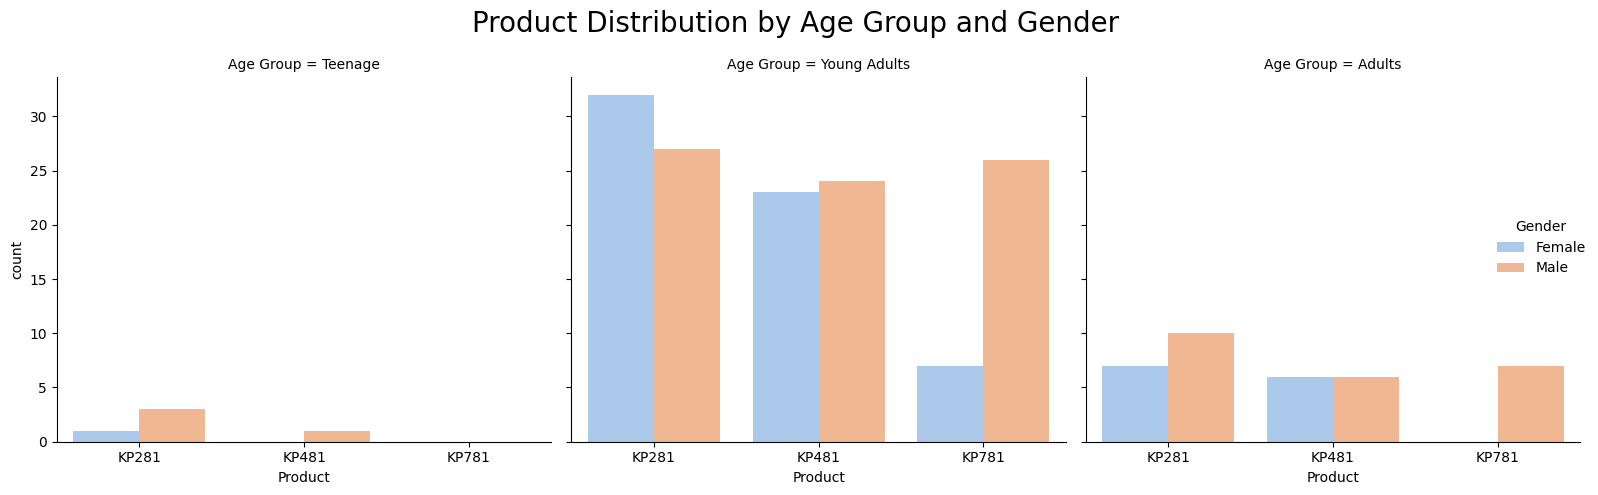

In [ ]:
#plotting
g=sns.catplot(data=aerofit, x='Product', col='Age Group', hue='Gender', kind='count', palette='pastel')
#sns.boxplot(data=aerofit, x='Product', y='Income', hue='Gender')
#sns.boxplot(data=aerofit, x='Product', y='Miles', ax=axs[1])

#Title
g.fig.suptitle('Product Distribution by Age Group and Gender', size=20)


#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

Building on insights from the previous bivariate analysis, which highlighted young adults as key consumers of our treadmills, a deeper investigation into the gender demographics within this age group provides additional clarity. The multivariate plot of product distribution by age group and gender reveals distinct preferences: the KP-281 treadmill is particularly favored by female young adults, suggesting it meets their specific needs or preferences effectively. In contrast, the KP-481 model sees relatively balanced demand from both genders, indicating its broader appeal. The KP-781 model, however, is more popular among male young adults, perhaps due to its advanced features or suitability for more rigorous workouts.

In the teenage demographic, no significant trends emerge, possibly due to a smaller sample size or less distinct preferences. Meanwhile, adult purchasers show interest across all models, though their numbers are modest compared to the young adults.

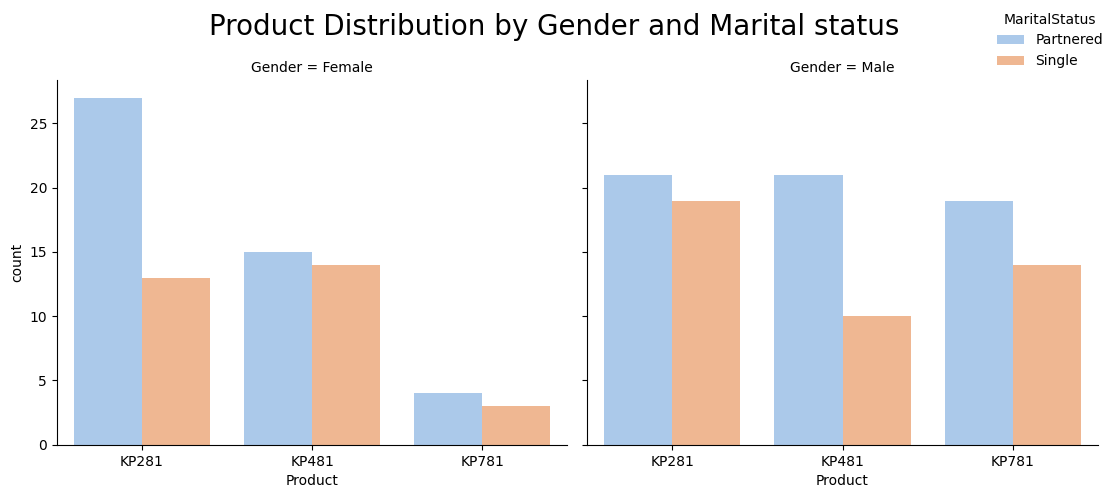

In [ ]:
#plotting
g=sns.catplot(data=aerofit, x='Product', col='Gender', hue='MaritalStatus', kind='count', palette='pastel')
sns.move_legend(g,'upper right')

#Title
g.fig.suptitle('Product Distribution by Gender and Marital status', size=20)

#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

From the analysis of product preferences across gender and marital status, the data illustrates distinct patterns in treadmill purchases. Partnered males demonstrate a balanced preference across all Aerofit models, indicating no significant bias towards any particular treadmill. Conversely, among partnered females, there is a pronounced preference for the KP-281 model. This trend suggests that while male customers exhibit varied tastes regardless of marital status, partnered females are particularly inclined towards the KP-281 treadmill.

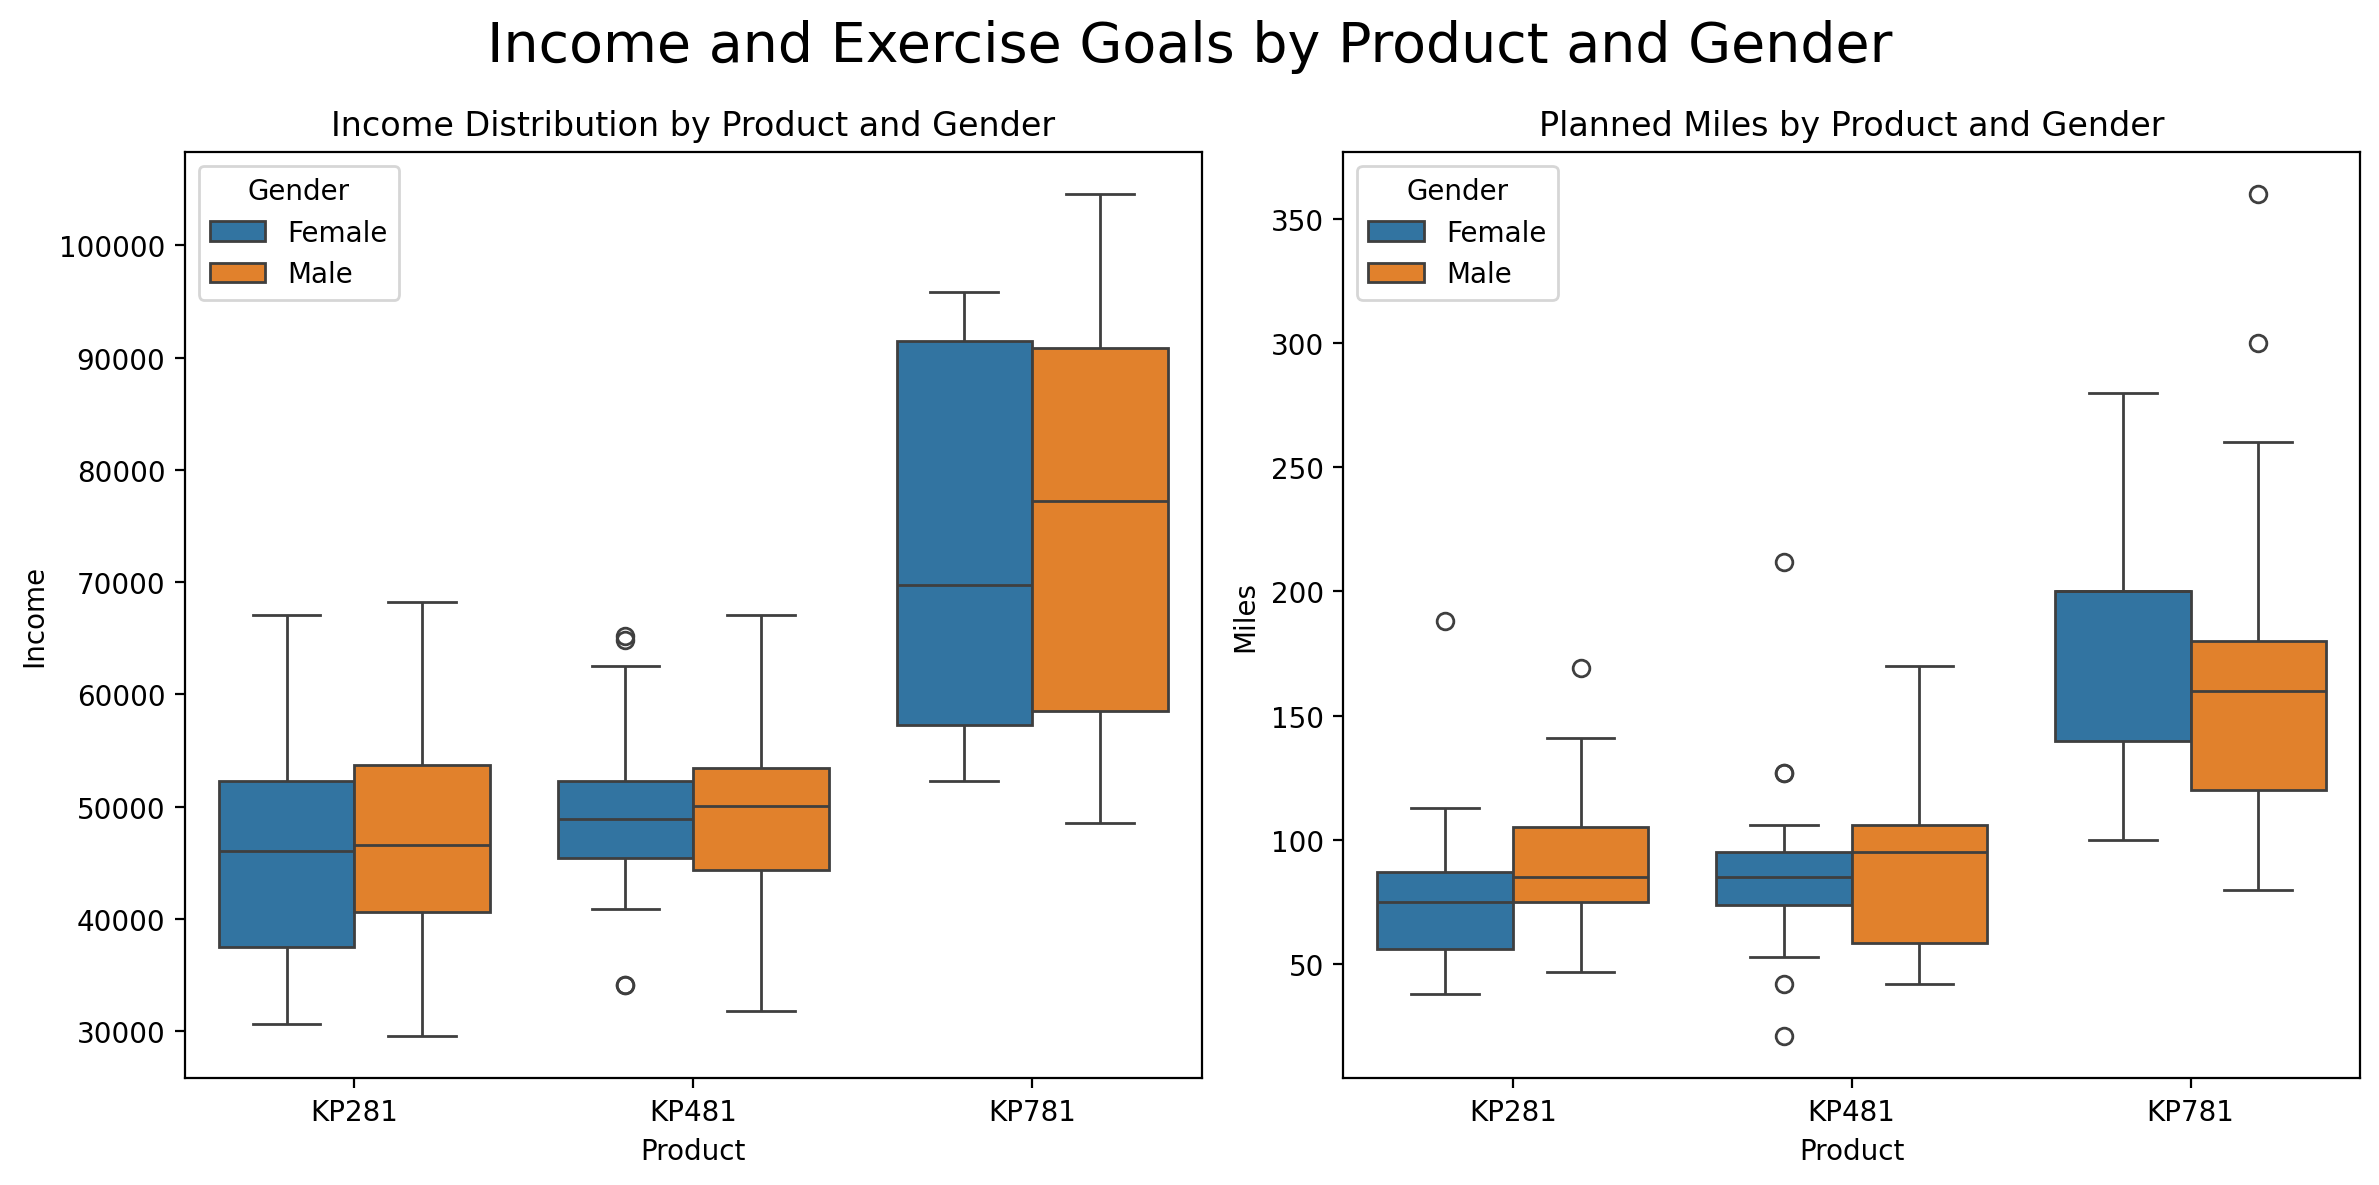

In [ ]:
#Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=1, figsize=(12,6), dpi=200)

#plotting
sns.boxplot(data=aerofit, x='Product', y='Income', hue='Gender', ax=axs[0])
sns.boxplot(data=aerofit, x='Product', y='Miles', hue='Gender', ax=axs[1])

#Title
fig.suptitle('Income and Exercise Goals by Product and Gender', size=20)
axs[0].set_title('Income Distribution by Product and Gender')
axs[1].set_title('Planned Miles by Product and Gender')

#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

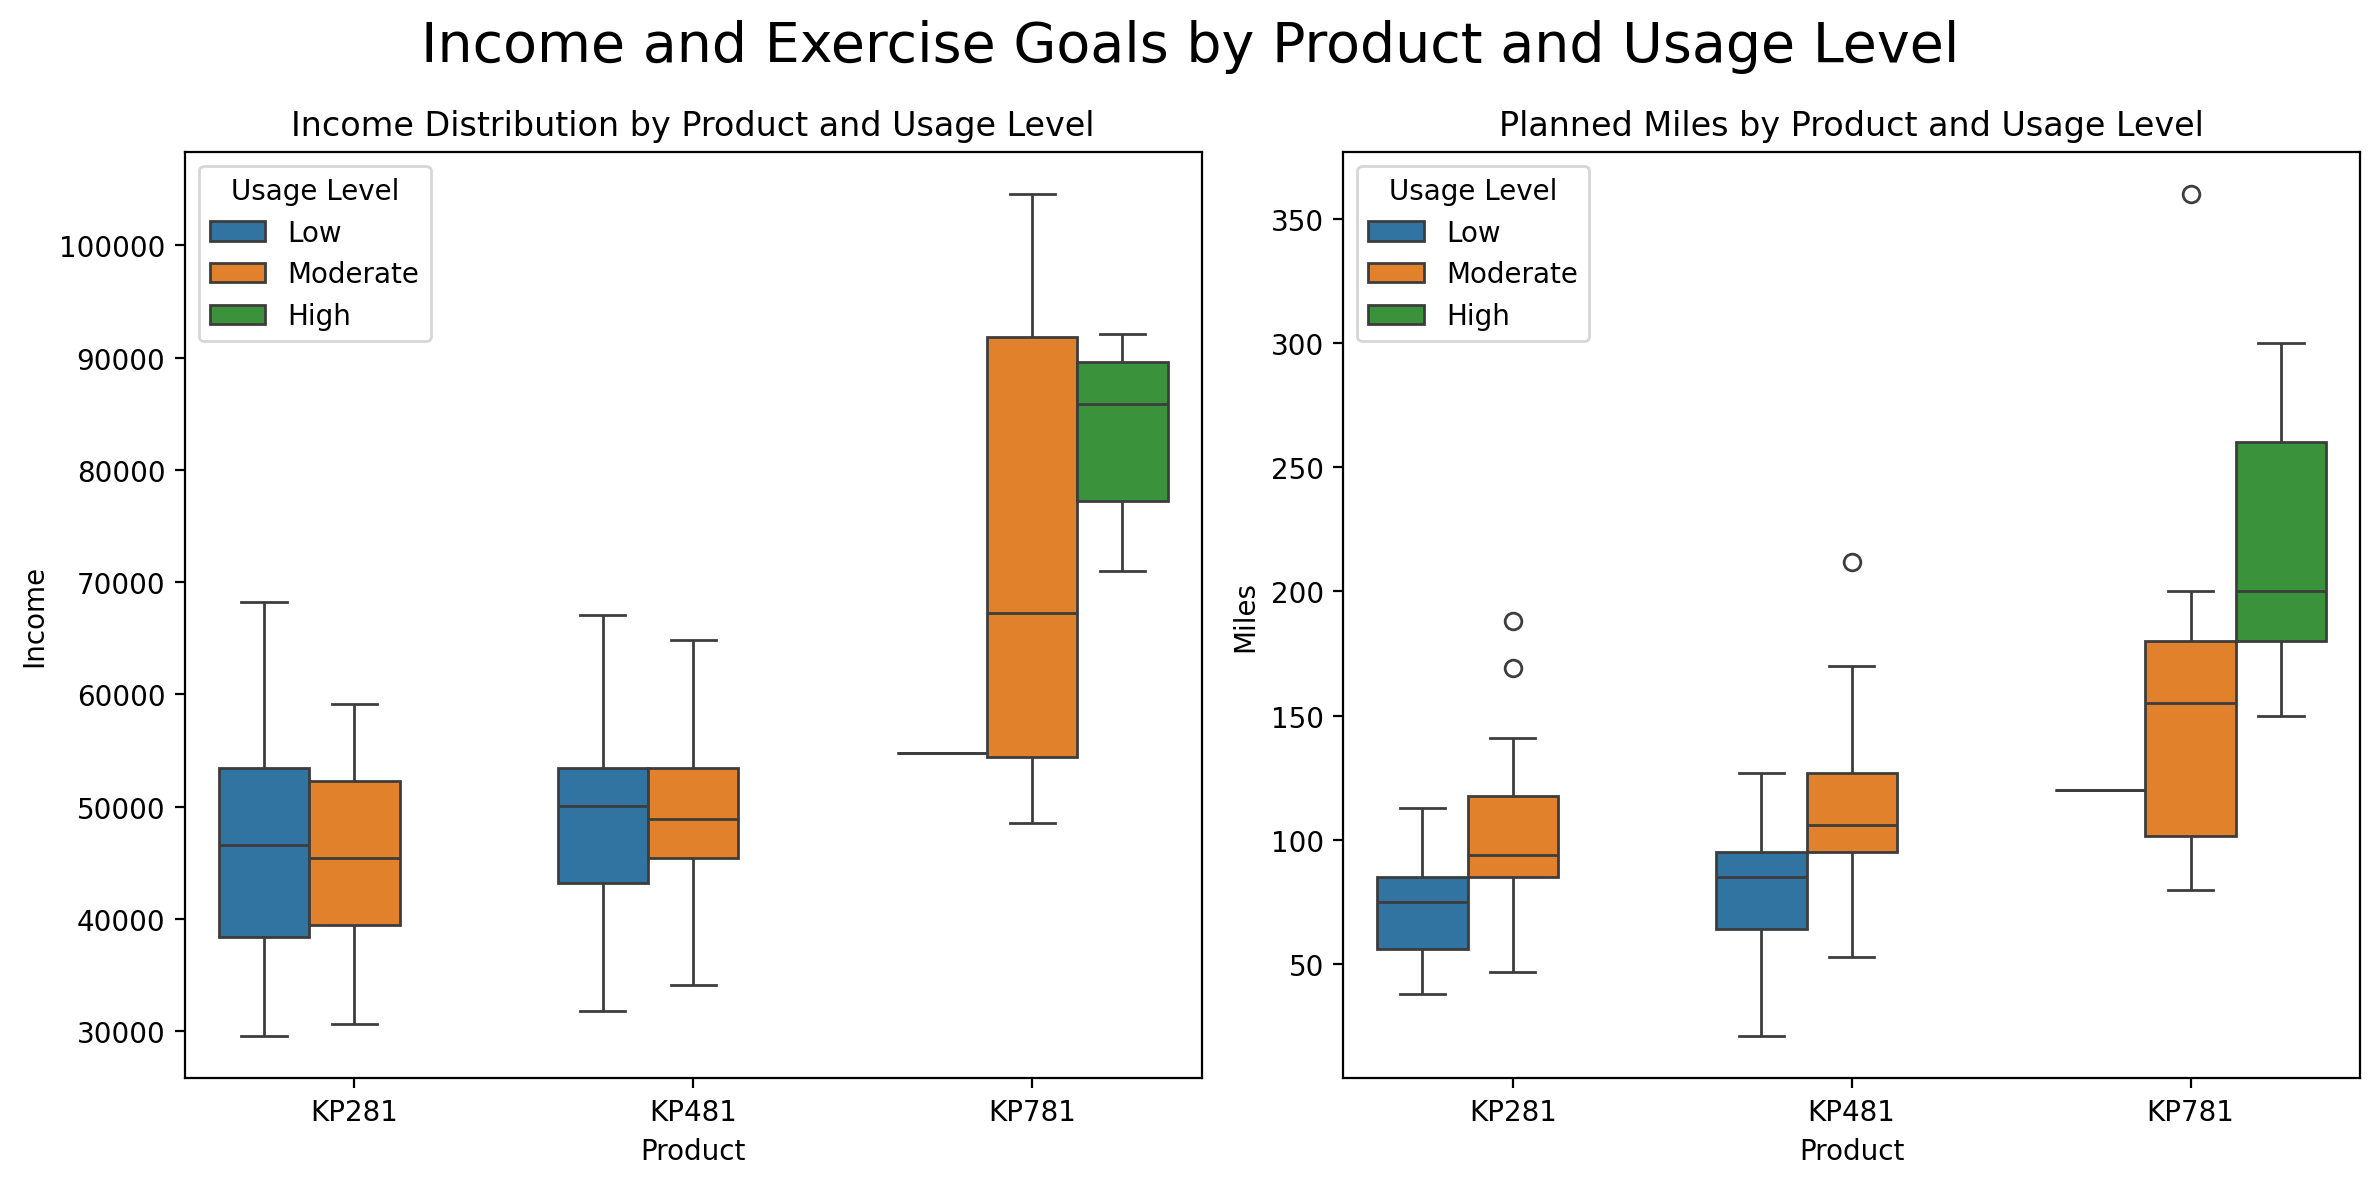

In [ ]:
#Setting up the canvas
fig,axs=plt.subplots(ncols=2, nrows=1, figsize=(12,6), dpi=200)

#plotting
sns.boxplot(data=aerofit, x='Product', y='Income', hue='Usage Level', ax=axs[0])
sns.boxplot(data=aerofit, x='Product', y='Miles', hue='Usage Level', ax=axs[1])

#Title
fig.suptitle('Income and Exercise Goals by Product and Usage Level', size=20)
axs[0].set_title('Income Distribution by Product and Usage Level')
axs[1].set_title('Planned Miles by Product and Usage Level')

#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

The analysis of income and exercise goals segmented by product type and gender reveals notable trends in treadmill preferences based on financial and fitness considerations. Specifically, the income distribution relative to product type and usage levels indicates that individuals with incomes above $50,000 generally align with moderate to high fitness ambitions, predominantly opting for the KP-781 treadmill. This trend suggests that higher-income individuals may prioritize more advanced features or durability that accommodate intensive use, reflected in their choice of the higher-end KP-781 model.

Conversely, individuals with lower fitness goals, characterized by low to moderate exercise plans, frequently choose the KP-281 and KP-481 models. These treadmills appear to cater to users with less intense training requirements, possibly due to more affordable pricing or suitability for lighter, more casual use.

The miles planned by product and usage level graph corroborates these findings, showing that purchasers of the KP-781 are typically planning for higher weekly mileage, which aligns with more rigorous training schedules. In contrast, those opting for KP-281 and KP-481 tend to plan for lower mileage, indicating less usage patterns.

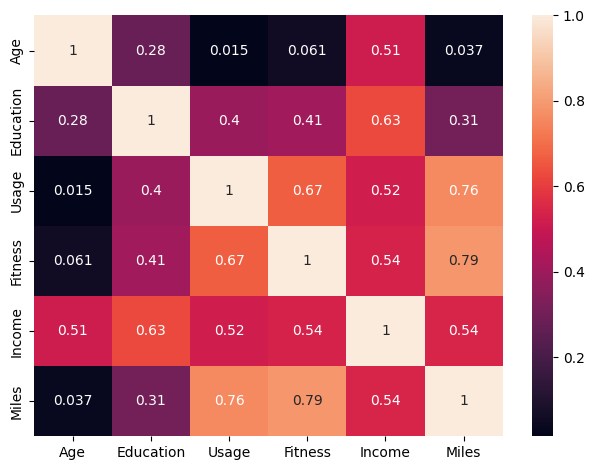

In [ ]:
#plotting
sns.heatmap(aerofit[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr(), annot=True)

#Adjust subplots layout
plt.tight_layout()

#display
plt.show()

### Probability Calculations in Customer Data Analysis

As we advance in our analysis of the Aerofit customer dataset, our focus shifts to probability calculations. This stage is pivotal as it allows us to quantify the likelihood of various outcomes, based on the categorical data transformations previously applied. Through calculating probabilities, our goal is to delve deeper into the nuances of our dataset, particularly in terms of product preferences, customer demographics, and usage patterns.

#### Objectives of Probability Analysis:

1. **Understanding Conditional Probabilities**: Calculating conditional probabilities helps in understanding the likelihood of one event given the presence of another. This analysis is crucial for deciphering relationships within our data, such as the probability of purchasing a specific product given a customer’s age group or fitness level.

2. **Analyzing Joint Probabilities**: Exploring joint probabilities enables us to assess the likelihood of two events happening together. For example, we might look at the probability of a customer being a post graduate and choosing a high-end treadmill model. This helps in identifying co-occurrences that can pinpoint market segments with specific characteristics.

3. **Determining Marginal Probabilities**: These calculations provide insights into the overall likelihood of any single outcome within our dataset, independent of other variables. For instance, marginal probabilities can reveal the overall percentage of customers who opt for a particular treadmill model, regardless of other factors like age or gender.

Through this detailed examination, we aim to establish a comprehensive understanding of the statistical relationships within our data, thereby facilitating more informed decisions and strategies that align with our findings. This approach not only enhances our strategic capabilities but also optimizes our market positioning and customer engagement efforts.

* **Income Categorization:**
To better understand consumer behavior across different economic segments, we categorize the 'Income' variable into distinct groups. This enables a more nuanced analysis of purchasing patterns and preferences, aiding in tailoring marketing and product strategies to meet the needs of each income segment. The categories are defined as:
 - **Entry-Tier**: Below \$50,000
 - **Mid-Tier**: \$50,000 to \$70,000
 - **High-Tier**: Above \$70,000

* **Miles Categorization:**
Similarly, by categorizing the 'Miles' variable, which represents the distance customers plan to run each week, we can gain insights into the fitness goals and usage intensity of our treadmill products. This categorization helps in understanding how different products cater to varying exercise commitments. The categories might look like:
 - **Casual**: Less than 100 miles per week
 - **Regular**: 100 to 200 miles per week
 - **Enthusiast**: More than 200 miles per week

These categorizations allow for a structured analysis, making it easier to compute probabilities and conduct segment-specific evaluations. They help illustrate trends and patterns, providing a clearer picture of customer preferences and behaviors, and supporting informed decision-making based on segmented data.

In [ ]:
bins=[aerofit['Income'].min()-1,50000,70000,aerofit['Income'].max()+1]
labels=['Entry-Tier','Mid-Tier','High-Tier']
aerofit['Income Tier']=pd.cut(x=aerofit['Income'],bins=bins, labels=labels)

bins=[aerofit['Miles'].min()-1,100,200 ,aerofit['Miles'].max()+1]
labels=['Casual','Regular','Enthusiast']
aerofit['Exercise Intensity']=pd.cut(x=aerofit['Miles'],bins=bins, labels=labels)

aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Level,Usage Level,Education Level,Age Group,Income Tier,Exercise Intensity
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Low,Graduate,Teenage,Entry-Tier,Regular
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Low,Graduate,Teenage,Entry-Tier,Casual
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Moderate,Graduate,Teenage,Entry-Tier,Casual
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Low,High School,Teenage,Entry-Tier,Casual
4,KP281,20,Male,13,Partnered,4,2,35247,47,Poor,Moderate,Graduate,Young Adults,Entry-Tier,Casual


In [ ]:
np.round(pd.crosstab(index=aerofit['Gender'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.2,16.1,3.9,42.2
Male,22.2,17.2,18.3,57.8
All,44.4,33.3,22.2,100.0


- **KP-281:** This model is equally popular among both males and females, with each gender contributing 22.2% to its total purchases. This indicates a gender-neutral preference for KP-281, accounting for 44.4% of all treadmill purchases.
- **KP-481:** There is a slight gender disparity in preference for KP-481. Males show a marginally higher preference at 17.2% compared to 16.1% for females. Combined, KP-481 makes up 33.3% of all treadmill purchases.
- **KP-781:** This model displays a significant gender skew with males showing a notably higher purchasing rate (18.3%) compared to females (3.9%). This model constitutes 22.2% of the total purchases, with a clear male dominance.

Overall, 42.2% of the purchases are made by females, and 57.8% by males. This distribution underscores certain gender-specific preferences towards different treadmill models, with KP-781 being significantly more popular among males and KP-281 showing a balanced distribution. Such insights can be pivotal for targeted marketing strategies and product enhancements tailored to the nuanced needs of different gender groups within the fitness market.

In [ ]:
np.round(pd.crosstab(index=aerofit['Gender'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Gender,,,
Female,52.6,38.2,9.2
Male,38.5,29.8,31.7


Given the gender of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides insightful trends into their purchasing preferences. These percentages express the conditional probabilities of choosing specific models based on the customer's gender:

* **For Females:**
 - **KP-281**: There is a 52.6% probability that a female customer will select the KP-281 treadmill.
 - **KP-481**: There is a 38.2% probability that female customers will choose the KP-481 treadmill.
 - **KP-781**: There is only a 9.2% probability that a treadmill purchased by a female will be the KP-781 model, indicating a much lower preference for this more advanced or possibly more expensive model.

* **For Males:**
 - **KP-281**: There is a 38.5% probability that male customers will select the KP-281 treadmill. This model is popular among males, but not as much as it is among females.
 - **KP-481**: There is a 29.8% probability that males will opt for the KP-481 treadmill, making it the least preferred among the males but still relatively popular.
 - **KP-781**: There is a 31.7% probability that a treadmill purchased by a male will be the KP-781 model. This starkly contrasts female preferences and shows a significant inclination among males towards this model, likely due to its advanced features or superior performance capabilities.

These conditional probabilities highlight significant gender-based differences in product preferences. Females predominantly prefer the KP-281, likely for its features and affordability. In contrast, a considerable proportion of males show a preference for the more advanced KP-781, pointing towards different priorities and expectations from their fitness equipment.

In [ ]:
np.round(pd.crosstab(index=aerofit['MaritalStatus'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.7,20.0,12.8,59.4
Single,17.8,13.3,9.4,40.6
All,44.4,33.3,22.2,100.0


The data presented in the table illustrates the distribution of product purchases across marital statuses and provides insight into which treadmills are favored by partnered versus single customers. This breakdown is shown as a percentage of the total dataset:

- **Partnered Customers:**
  - They account for 59.4% of all purchases in the dataset.
  - Among them, 26.7% purchased the KP-281, 20.0% opted for the KP-481, and 12.8% chose the KP-781.

- **Single Customers:**
  - They make up 40.6% of the total purchases.
  - Their preference shows 17.8% buying the KP-281, 13.3% going for the KP-481, and 9.4% selecting the KP-781.

In [ ]:
np.round(pd.crosstab(index=aerofit['MaritalStatus'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.9,33.6,21.5
Single,43.8,32.9,23.3


Given the Marital status of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides insightful trends into their purchasing preferences. These percentages reflect the likelihood of choosing specific models based on the customer's Marital status:

* **For customers who are partnered:**
 - Approximately 44.9% prefer KP-281.
 - About 33.6% go for KP-481.
 - And 21.5% choose KP-781.

* **For single customers:**
 - Around 43.8% opt for KP-281.
 - 32.9% favor KP-481.
 - And 23.3% select KP-781.

This indicates that both partnered and single customers have similar preferences for KP-281 and KP-481, with a slightly higher percentage of single customers choosing the more intensive KP-781 compared to their partnered counterparts.

In [ ]:
np.round(pd.crosstab(index=aerofit['Usage Level'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Usage Level,,,,
Low,31.1,25.0,0.6,56.7
Moderate,13.3,8.3,16.7,38.3
High,0.0,0.0,5.0,5.0
All,44.4,33.3,22.2,100.0


- **Low Usage Level**:
  - 31.1% of customers in this group prefer KP-281.
  - 25.0% choose KP-481.
  - Only 0.6% opt for KP-781.
  - This group represents 56.7% of all customers, indicating that those with low usage levels generally prefer less advanced models.

- **Moderate Usage Level**:
  - 13.3% prefer KP-281.
  - 8.3% go for KP-481.
  - 16.7% select KP-781, marking a significant increase in preference for this more advanced model compared to low usage customers.
  - Overall, 38.3% of customers fall into this usage category.

- **High Usage Level**:
  - No customers in this category choose KP-281 or KP-481.
  - 5.0% of the entire dataset, all within this group, prefer KP-781, highlighting that this model is exclusively favored by those with high usage demands.

The distribution indicates a clear pattern: as usage level increases, customer preference shifts from the basic KP-281 and KP-481 models towards the more advanced KP-781 model.

In [ ]:
np.round(pd.crosstab(index=aerofit['Usage Level'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Usage Level,,,
Low,54.9,44.1,1.0
Moderate,34.8,21.7,43.5
High,0.0,0.0,100.0


Given the Usage level of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides insightful trends into their purchasing preferences. These percentages reflect the likelihood of choosing specific models based on the customer's Usage level:

- **Low Usage Level**:
  - 54.9% of customers in this group prefer KP-281, the simplest model.
  - 44.1% choose KP-481, indicating a preference for moderately advanced features among less frequent users.
  - Only 1.0% opt for KP-781, suggesting that this high-end model is rarely chosen by those with low usage levels.

- **Moderate Usage Level**:
  - 34.8% of customers prefer KP-281.
  - 21.7% go for KP-481.
  - Notably, 43.5% choose KP-781, demonstrating a significant preference for the most advanced model among moderately active users.

- **High Usage Level**:
  - None of the customers in this category choose KP-281 or KP-481.
  - 100% of the customers with high usage levels prefer KP-781, clearly indicating that the most active users require the advanced features and capabilities of the KP-781 model.

This analysis highlights distinct trends in product preference based on the frequency and intensity of use. While low usage customers mostly opt for basic or moderately advanced treadmills, those with moderate and high usage levels increasingly favor the high-end KP-781, aligning with their greater demands for durability and advanced functionality.

In [ ]:
np.round(pd.crosstab(index=aerofit['Fitness Level'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Fitness Level,,,,
Average,30.0,21.7,2.2,53.9
Excellent,1.1,0.0,16.1,17.2
Good,5.0,4.4,3.9,13.3
Poor,7.8,6.7,0.0,14.4
Very Poor,0.6,0.6,0.0,1.1
All,44.4,33.3,22.2,100.0


- **Average Fitness Level**:
  - Constitutes the majority, 53.9% of the customer base.
  - Prefers KP-281 predominantly, with 30.0% of all customers selecting this model.
  - KP-481 and KP-781 are chosen by 21.7% and 2.2% of customers at this fitness level, respectively, suggesting a moderate inclination towards more basic treadmill models.

- **Excellent Fitness Level**:
  - Represents 17.2% of customers.
  - Shows a strong preference for the high-end KP-781, with 16.1% of all customers in this category choosing it, indicating that more advanced users require sophisticated features.
  - Only 1.1% select KP-281, and none choose KP-481.

- **Good Fitness Level**:
  - Accounts for 13.3% of the customer base.
  - Distribution is relatively balanced across the models with a slight preference for KP-781 (3.9%), followed by KP-281 (5.0%) and KP-481 (4.4%).

- **Poor Fitness Level**:
  - Comprises 14.4% of the total.
  - Favors more basic models, with KP-281 being chosen by 7.8% and KP-481 by 6.7% of the customers, indicating that those with lesser fitness prefer simpler, less demanding equipment.

- **Very Poor Fitness Level**:
  - The smallest group, making up only 1.1% of all customers.
  - Very limited interest in treadmills, with equal minimal distribution among KP-281 and KP-481 (0.6% each), and no selection of KP-781.

These insights illustrate clear trends in product preferences linked to the customers' fitness levels, with higher-end models like KP-781 appealing significantly to those at higher fitness levels, while KP-281 tends to attract those at lower or average fitness levels.

In [ ]:
np.round(pd.crosstab(index=aerofit['Fitness Level'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Fitness Level,,,
Average,55.7,40.2,4.1
Excellent,6.5,0.0,93.5
Good,37.5,33.3,29.2
Poor,53.8,46.2,0.0
Very Poor,50.0,50.0,0.0


Given the fitness levels of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides insightful trends into their preferences. These percentages reflect the likelihood of choosing specific models based on the customer's categorized fitness level:

- **Average Fitness Level**:
  - Customers with an average fitness level show a predominant preference for the KP-281 model, with 55.7% opting for it.
  - KP-481 is also fairly popular among this group, capturing 40.2%.
  - KP-781, being a more advanced model, is less favored, with only 4.1% choosing it, suggesting that individuals at an average fitness level generally prefer more basic or mid-range treadmills.

- **Excellent Fitness Level**:
  - This category demonstrates a striking preference for the high-end KP-781, chosen by an overwhelming 93.5% of customers classified with excellent fitness.
  - The KP-281 model sees minimal traction at 6.5%, while KP-481 is entirely unselected, indicating that highly fit individuals predominantly seek advanced features and capabilities that support intense workouts.

- **Good Fitness Level**:
  - Preferences among those with a good fitness level are more evenly spread across the options.
  - KP-281 is selected by 37.5%, closely followed by KP-481 at 33.3%, and KP-781 at 29.2%, showing a balanced distribution that suggests a mixed requirement for features and performance.

- **Poor Fitness Level**:
  - Customers with a poor fitness level are nearly equally divided between KP-281 (53.8%) and KP-481 (46.2%), with none opting for KP-781.
  - This indicates a preference for simpler, less intensive treadmills that perhaps offer ease of use and basic functionality, appropriate for less fit individuals.

- **Very Poor Fitness Level**:
  - This group, though small, evenly splits their preferences between KP-281 and KP-481 at 50% each.
  - Similar to those with a poor fitness level, the absence of preference for KP-781 suggests a lack of need or desire for advanced treadmill features among those with very poor fitness.

These findings reveal significant insights into the product preferences based on fitness levels, indicating that as fitness levels improve, there is a marked shift towards choosing more advanced treadmill models.

In [ ]:
np.round(pd.crosstab(index=aerofit['Education Level'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Education Level,,,,
High School,1.1,0.6,0.0,1.7
Graduate,42.2,31.7,9.4,83.3
Post-Graduate,1.1,1.1,12.8,15.0
All,44.4,33.3,22.2,100.0


- **High School**:
  - **KP-281**: Only 1.1% of all treadmill purchases are made by customers with a high school education, specifically for the KP-281 model.
  - **KP-481**: A minimal 0.6% of the total purchases involve the KP-481 treadmill by high school-educated customers, indicating very low interest or accessibility.
  - **KP-781**: There are no purchases of the KP-781 model among high school level customers, suggesting the model may be out of the preference or price range for this group.

- **Graduate**:
  - **KP-281**: A significant 42.2% of all treadmill sales are to customers with a graduate level of education, choosing the KP-281 model, highlighting a strong preference or suitability of this model for this demographic.
  - **KP-481**: 31.7% of total treadmill purchases are by graduate-educated customers for the KP-481, making it fairly popular but not as much as KP-281.
  - **KP-781**: 9.4% of all purchases for KP-781 are made by graduates, indicating some interest in this more advanced model.

- **Post-Graduate**:
  - **KP-281**: Post-graduate customers make up only 1.1% of KP-281 purchases, showing limited preference or need for this model.
  - **KP-481**: Similarly, only 1.1% of KP-481 sales are to post-graduate customers.
  - **KP-781**: Notably, 12.8% of all KP-781 sales are to post-graduates, a substantial percentage compared to other models, pointing to a strong preference for the most advanced features offered by KP-781 among highly educated users.

This data underscores the influence of education level on product choice, with more advanced educational backgrounds gravitating towards higher-end models, potentially reflecting higher income levels or a greater interest in premium fitness equipment.

In [ ]:
np.round(pd.crosstab(index=aerofit['Education Level'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Education Level,,,
High School,66.7,33.3,0.0
Graduate,50.7,38.0,11.3
Post-Graduate,7.4,7.4,85.2


Given the education levels of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides insightful trends into their preferences. These percentages express the conditional probabilities of choosing specific models based on the customer's categorized education level:

- **High School:**
 - **KP-281**: There is a 66.7% probability that a customer with a high school education will select the KP-281 treadmill. This indicates a strong preference for this more basic or potentially more affordable model among high school-educated customers.
 - **KP-481**: There is a 33.3% probability that customers with a high school education will choose the KP-481 treadmill, showing a moderate preference for this mid-range model.
 - **KP-781**: There is a 0% probability that a treadmill purchased by a high school-educated customer will be the KP-781 model, suggesting that the advanced features or higher cost of this model may not align with the needs or financial reach of this group.

* **Graduate:**
 - **KP-281**: There is a 50.7% probability that graduates will select the KP-281 treadmill, making it the most popular choice within this educational group, though less dominant than among high school-educated customers.
 - **KP-481**: There is a 38% probability that graduates will choose the KP-481 treadmill, indicating a strong inclination towards this model.
 - **KP-781**: There is an 11.3% probability that a treadmill purchased by a graduate will be the KP-781 model, showing some interest in the more advanced features of this model, but it's less preferred compared to the other treadmills.

* **Post-Graduate:**
 - **KP-281**: There is only a 7.4% probability that post-graduate customers will select the KP-281 treadmill, indicating very limited interest in this basic model.
 - **KP-481**: There is also a 7.4% probability that post-graduates will choose the KP-481, reflecting an equal but low preference for this model among post-graduates.
 - **KP-781**: There is an 85.2% probability that a treadmill purchased by post-graduates will be the KP-781 model. This overwhelming preference suggests that post-graduates significantly favor the advanced features and possibly the prestige associated with the highest-end treadmill.

This analysis reveals that educational attainment significantly influences not only the likelihood of purchasing a treadmill but also the selection of specific models. Higher education levels, particularly among post-graduates, show a marked preference for higher-end, feature-rich treadmill models.

In [ ]:
np.round(pd.crosstab(index=aerofit['Age Group'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Age Group,,,,
Teenage,2.2,0.6,0.0,2.8
Young Adults,32.8,26.1,18.3,77.2
Adults,9.4,6.7,3.9,20.0
All,44.4,33.3,22.2,100.0


- **Teenage (Age Group)**:
  - **KP-281**: Teenagers account for 2.2% of KP-281 purchases, suggesting a modest attraction to this model.
  - **KP-481**: Only 0.6% of KP-481 sales are made to teenagers, indicating this model is the least favored among the younger demographic.
  - **KP-781**: There are no recorded purchases of the KP-781 model by teenagers, which could be due to its advanced features or higher price point being less suited to this age group.

- **Young Adults (Age Group)**:
  - **KP-281**: Young adults significantly favor KP-281, with 32.8% of its purchases coming from this age group, highlighting its popularity among those likely at the beginning of their careers or in early stages of family life.
  - **KP-481**: This group also makes up a substantial 26.1% of KP-481's sales, suggesting a strong but slightly lesser preference compared to KP-281.
  - **KP-781**: Young adults account for 18.3% of KP-781 purchases, showing considerable interest in this advanced model, possibly driven by higher disposable incomes or more serious fitness goals compared to other groups.

- **Adults (Age Group)**:
  - **KP-281**: Adults purchase KP-281 at a rate of 9.4%, indicating it is a popular choice but less so than among young adults.
  - **KP-481**: 6.7% of KP-481 sales come from adults, which suggests moderate popularity.
  - **KP-781**: Only 3.9% of KP-781 purchases are made by adults, showing the least preference for this high-end model among the older demographics.

Overall, these figures highlight that young adults are the primary purchasers of treadmills, showing varied preferences across the model spectrum, potentially due to their relatively better financial positioning or a higher focus on fitness. In contrast, teenagers and adults show more conservative purchase patterns, possibly influenced by different lifestyle needs and financial priorities.

In [ ]:
np.round(pd.crosstab(index=aerofit['Age Group'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Age Group,,,
Teenage,80.0,20.0,0.0
Young Adults,42.4,33.8,23.7
Adults,47.2,33.3,19.4


Given the age group of customers, the conditional probability distribution for selecting different Aerofit treadmill models illustrates distinct preferences across different life stages. These percentages express the likelihood of selecting specific models based on the customer's age group:

* **Teenage (Age Group):**
 - **KP-281**: There is an 80% probability that teenagers will select the KP-281 treadmill, reflecting a very strong preference likely due to its affordability and suitability for beginners.
 - **KP-481**: There is a 20% probability that teenagers will choose the KP-481 treadmill, indicating a moderate preference for this model, which offers more features than the KP-281 but remains budget-friendly.
 - **KP-781**: Teenagers have a 0% probability of purchasing the KP-781, suggesting that its advanced features or higher price point do not align with their needs or financial capabilities.

* **Young Adults (Age Group):**
 - **KP-281**: There is a 42.4% probability that young adults will choose the KP-281 treadmill, making it the most preferred model in this group, though the spread across models indicates varied needs and preferences.
 - **KP-481**: There is a 33.8% probability that young adults will select the KP-481 treadmill, showing significant appeal due to its balance of functionality and price.
 - **KP-781**: There is a 23.7% probability that young adults will opt for the KP-781 treadmill, reflecting a considerable interest in more advanced fitness equipment, possibly driven by higher fitness engagement or greater purchasing power.

* **Adults (Age Group):**
 - **KP-281**: There is a 47.2% probability that adults will choose the KP-281 treadmill, indicating it as the preferred model for its suitability in maintaining general health.
 - **KP-481**: There is a 33.3% probability that adults will select the KP-481, showing it as a reasonably popular choice for those maintaining a moderate fitness routine.
 - **KP-781**: There is a 19.4% probability that adults will purchase the KP-781, suggesting some interest in advanced fitness features but at a lower rate compared to younger adults.

These insights reveal that the KP-281 is a consistent favorite across all age groups, though younger adults display more diversity in their treadmill choices, including a substantial number opting for the more advanced KP-781 model.

In [ ]:
np.round(pd.crosstab(index=aerofit['Income Tier'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Income Tier,,,,
Entry-Tier,26.7,16.7,2.8,46.1
Mid-Tier,17.8,16.7,6.7,41.1
High-Tier,0.0,0.0,12.8,12.8
All,44.4,33.3,22.2,100.0


- **Entry-Tier (Income Group)**:
  - **KP-281**: Accounts for a significant 26.7% of all treadmill purchases, suggesting that this model is highly popular among those with lower income, likely due to its affordability.
  - **KP-481**: Purchased by 16.7% of the entry-tier income group, this model also appeals to the budget-conscious consumer but to a lesser extent than the KP-281.
  - **KP-781**: Only 2.8% of entry-tier consumers opt for KP-781, indicating that its higher price point may be a deterrent for this income group.

- **Mid-Tier (Income Group)**:
  - **KP-281**: Chosen by 17.8% within this tier, it remains popular but less so than in the entry-tier, perhaps as this group may have access to a broader range of options.
  - **KP-481**: Also captures 16.7% of the mid-tier market, suggesting consistent appeal across the entry and mid income levels.
  - **KP-781**: Sees a slight increase to 6.7% in this income tier, possibly reflecting a greater ability to invest in more expensive fitness equipment.

- **High-Tier (Income Group)**:
  - **KP-281**: No purchases were recorded in the high-tier income group for KP-281, which may indicate that this group prefers more advanced models.
  - **KP-481**: Similarly, there are no purchases for KP-481 in the high-tier, emphasizing a shift in preference towards higher-end products.
  - **KP-781**: Significantly, 12.8% of all treadmill sales come from the high-tier income group purchasing the KP-781 model, clearly indicating a preference for premium, feature-rich equipment among the economically advantaged.

This analysis underscores the impact of income on consumer behavior, with price sensitivity evidently decreasing as income increases. It also highlights the distinct product preferences among different income tiers, with the higher income group showing a clear preference for the most advanced treadmill available, KP-781, aligning with their capacity for higher expenditure on luxury or premium products.

In [ ]:
np.round(pd.crosstab(index=aerofit['Income Tier'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Income Tier,,,
Entry-Tier,57.8,36.1,6.0
Mid-Tier,43.2,40.5,16.2
High-Tier,0.0,0.0,100.0


Given the income tier of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides clear insights into purchasing preferences related to financial capability. These percentages denote the likelihood of choosing specific models based on the customer's income tier:

- **Entry-Tier (Income Group):**
  - **KP-281**: There is a 57.8% probability that entry-tier customers will select the KP-281 treadmill, highlighting its attractiveness as an affordable option.
  - **KP-481**: There is a 36.1% probability that entry-tier customers will choose the KP-481 treadmill, indicating a moderate preference for a slightly more expensive model with additional features.
  - **KP-781**: There is only a 6.0% probability that entry-tier customers will opt for the KP-781 treadmill, demonstrating that its higher price makes it a less feasible choice for this group.

- **Mid-Tier (Income Group):**
  - **KP-281**: There is a 43.2% probability that mid-tier customers will choose the KP-281 treadmill, confirming consistent approval of this model's feature-to-cost ratio.
  - **KP-481**: There is a 40.5% probability that mid-tier customers will select the KP-481 treadmill, reflecting a strong affinity for this model which offers more features and perhaps better value for their income level.
  - **KP-781**: There is a 16.2% probability that mid-tier customers will opt for the KP-781 treadmill, indicating a greater capability and willingness to invest in more advanced fitness equipment compared to the entry-tier.

- **High-Tier (Income Group):**
  - **KP-281**: There is a 0% probability that high-tier customers will select the KP-281 treadmill, suggesting that it does not meet their expectations for features or prestige.
  - **KP-481**: Similarly, there is a 0% probability that high-tier customers will choose the KP-481 treadmill, reinforcing the notion that these models do not align with the desires or needs of the wealthiest customers.
  - **KP-781**: There is a 100% probability that high-tier customers will opt for the KP-781 treadmill, underscoring a unanimous preference for the most advanced and expensive model, which presumably matches their expectations for luxury and cutting-edge technology.

These probabilities clearly illustrate how purchasing patterns shift with income levels, showing a trend towards more expensive and advanced models as financial capability increases.

In [ ]:
np.round(pd.crosstab(index=aerofit['Exercise Intensity'], columns=aerofit['Product'], normalize='all', margins=True)*100,1)

Product,KP281,KP481,KP781,All
Exercise Intensity,,,,
Casual,34.4,24.4,4.4,63.3
Regular,10.0,8.3,15.0,33.3
Enthusiast,0.0,0.6,2.8,3.3
All,44.4,33.3,22.2,100.0


- **Casual (Exercise Intensity):**
  - **KP-281**: 34.4% of all purchases are made by customers who engage in casual exercise and choose the KP-281 model, making it the most popular choice in this segment.
  - **KP-481**: 24.4% of all purchases by casual exercisers are for the KP-481 treadmill.
  - **KP-781**: 4.4% of all purchases by casual exercisers are for the KP-781 treadmill, indicating a minimal preference for this model among casual exercisers.

- **Regular (Exercise Intensity):**
  - **KP-281**: 10.0% of all purchases are made by regular exercisers who choose the KP-281 treadmill, showing a lesser overall market share compared to casual exercisers.
  - **KP-481**: 8.3% of all purchases by regular exercisers are for the KP-481 treadmill.
  - **KP-781**: 15.0% of all purchases by regular exercisers are for the KP-781 treadmill, reflecting a stronger preference for this advanced model among more committed exercisers.

- **Enthusiast (Exercise Intensity):**
  - **KP-281**: 0.0% of all purchases are made by fitness enthusiasts for the KP-281 model, indicating no preference for this basic treadmill among the most intense exercisers.
  - **KP-481**: Only 0.6% of all purchases by enthusiasts are for the KP-481 treadmill.
  - **KP-781**: 2.8% of all purchases by enthusiasts are for the KP-781 treadmill, showcasing a significant preference for this high-end model among the most dedicated fitness participants.

This table illustrates how product choice varies significantly with the level of exercise intensity, highlighting a shift towards more advanced treadmills as the frequency and seriousness of workouts increase.

In [ ]:
np.round(pd.crosstab(index=aerofit['Exercise Intensity'], columns=aerofit['Product'], normalize='index')*100,1)

Product,KP281,KP481,KP781
Exercise Intensity,,,
Casual,54.4,38.6,7.0
Regular,30.0,25.0,45.0
Enthusiast,0.0,16.7,83.3


Given the exercise intensity levels of customers, the conditional probability distribution for selecting different Aerofit treadmill models provides insightful trends into their preferences for fitness equipment. These percentages reflect the likelihood of choosing specific models based on the categorized exercise intensity:

- **Casual (Exercise Intensity):**
  - **KP-281**: There is a 54.4% probability that customers who engage in casual exercise will select the KP-281 treadmill, indicating a strong preference for this model among less intense exercisers.
  - **KP-481**: There is a 38.6% probability that casual exercisers will choose the KP-481 treadmill, showing a substantial but lesser preference compared to KP-281.
  - **KP-781**: There is only a 7.0% probability that casual exercisers will opt for the KP-781 treadmill, suggesting that the advanced features and higher cost are less appealing to this group.

- **Regular (Exercise Intensity):**
  - **KP-281**: There is a 30.0% probability that customers who exercise regularly will choose the KP-281 treadmill, showing a reduced preference compared to casual exercisers.
  - **KP-481**: There is a 25.0% probability that regular exercisers will select the KP-481 treadmill, indicating it is relatively less favored among this group as well.
  - **KP-781**: There is a 45.0% probability that regular exercisers will opt for the KP-781 treadmill, demonstrating a significant inclination towards more advanced equipment suited to their consistent activity level.

- **Enthusiast (Exercise Intensity):**
  - **KP-281**: There is a 0.0% probability that fitness enthusiasts will select the KP-281 treadmill, indicating no interest in this basic model from those highly engaged in fitness.
  - **KP-481**: There is a 16.7% probability that enthusiasts will choose the KP-481 treadmill, showing some moderate interest but overshadowed by a stronger preference for a more advanced model.
  - **KP-781**: There is an 83.3% probability that enthusiasts will opt for the KP-781 treadmill, highlighting an overwhelming preference for this top-tier model, which likely offers features that meet the demands of their intensive workout routines.

These probabilities underscore how exercise intensity influences treadmill selection, with increasing preferences for more advanced models as exercise intensity escalates.

Based on the analysis of the Aerofit dataset across various demographic and behavioral attributes, here are some insights and recommendations for business strategy and marketing, as well as ideas for customer segmentation:

### Insights:
1. **Gender Preferences**:
   - **Females** primarily purchase the KP-281 model, which may indicate preferences for cost-effectiveness or specific features that cater to their fitness goals.
   - **Males** show a higher inclination towards the KP-781 model, suggesting that features or the advanced nature of the treadmill are appealing to them.

2. **Age Group Variability**:
   - **Teenagers** strongly prefer the basic KP-281, likely due to affordability and appropriateness for beginner fitness levels.
   - **Young Adults** exhibit a diversified preference, with a significant number choosing the more advanced KP-781, indicating a readiness to invest in higher-end models.
   - **Adults** mostly favor the KP-281 but also show reasonable interest in KP-781, implying a mix of budget consciousness and desire for advanced features.

3. **Income Influence**:
   - Customers in the **Entry-Tier** income predominantly choose lower-priced models (KP-281 and KP-481), emphasizing the impact of budget constraints.
   - **High-Tier** income customers exclusively purchase the KP-781, underscoring a clear preference for premium, feature-rich models.

4. **Education Level Impact**:
   - **High School** educated customers stick to the KP-281, possibly due to budget limitations.
   - **Post-Graduates** lean overwhelmingly towards the KP-781, possibly valuing its advanced features, which align with their higher educational attainments and associated income levels.

5. **Exercise Intensity Correlation**:
   - **Casual** exercisers prefer basic and intermediate models, reflecting less commitment to advanced training regimens.
   - **Enthusiasts**, who likely have more rigorous routines, predominantly choose KP-781, aligning with their need for advanced capabilities and durability.

### Recommendations:
1. **Targeted Marketing**:
   - Develop gender-specific marketing campaigns that highlight the preferred features of each model. For instance, promoting KP-281’s cost-effectiveness to females and KP-781’s advanced features to males.
   - Create age-specific promotions, like offering discounts for teenagers on KP-281 and bundling offers for young adults on KP-781.

2. **Product Development**:
   - Consider developing new models or upgrading existing ones to bridge gaps, such as a mid-tier model that offers advanced features at a slightly reduced cost to appeal more to mid-tier income levels and regular exercisers.

3. **Customer Engagement**:
   - Increase engagement with post-graduates and high-tier income groups through loyalty programs and exclusive offers on advanced models.
   - Organize fitness challenges and community events to engage young adults and enthusiasts, leveraging their preference for advanced models.

These strategies and segmentations can help Aerofit refine its marketing approach, enhance customer satisfaction, and improve sales outcomes by better aligning products with customer needs and preferences.